In [152]:
# Import Data Modules, Plotting Modules, and Stats/Regressions Packages
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
from sklearn.decomposition import PCA
from matplotlib.mlab import PCA
from scipy.misc import lena
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [153]:
cd

/home/dsi-student


# Armed Conflict and Location Event Data Set (ACLED)

In [154]:
# Upload the Africa ACLED Data Set
acled_africa = pd.read_csv('Desktop/ECON628-01-RPanlilio/ACLED-Africa.csv')

# Upload the Asia ACLED Data Set
acled_asia = pd.read_csv('Desktop/ECON628-01-RPanlilio/ACLED-Asia.csv')

In [155]:
# Head of Africa Data Set
acled_africa.head()

,ConflictID,Incompatibility,Territory,EventID,EventDate,EventType,Side A,Side B,CountryName,Gwno,Region,LocationName,Latitude,Longitude,GeoPrecision,TransferActor
0,66,1,Angola,10027,6/12/1965,1,Portugese Forces in Angola 1960-1975,FNLA,Angola,540,Bengo,Dembo,-7.9166,14.0666,1,NaN
1,66,1,Angola,10057,11/2/1975,1,Portugese Forces in Angola 1960-1975,UNITA-Uni�o Nacional para a Independ�ncia Tota...,Angola,540,NaN,Nova Redonda,-11.2000,13.8333,1,NaN
2,66,1,Angola,10017,3/4/1961,2,Portugese Forces in Angola 1960-1975,FNLA,Angola,540,Uige,Quixiximboa,-7.9666,15.6833,1,NaN
3,66,1,Angola,10008,7/12/1975,1,Portugese Forces in Angola 1960-1975,MPLA-Movimento Popular de Liberta��o de Angola,Angola,540,Lunda Sul,Henrique de Carvalho,-9.6500,20.4000,1,NaN
4,66,1,Angola,10037,1/1/1970,4,Portugese Forces in Angola 1960-1975,FNLA,Angola,540,Uige,Negage,-7.7666,15.2666,1,NaN


In [156]:
# Head of Asia Data Set
acled_asia.head()

,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,NOTES,FATALITIES,Unnamed: 25,Unnamed: 26
0,771.0,195.0,1619RTA,01-February-2017,2017.0,1.0,Riots/Protests,Protesters (Bangladesh),Journalists (Bangladesh),6.0,...,Chittagong,Chittagong,23.3494,91.8136,1.0,Bangladesh Government News,Journalists today staged a street�protest�in t...,0.0,NaN,NaN
1,771.0,198.0,1620RTA,01-February-2017,2017.0,1.0,Violence against civilians,Unidentified Armed Group (Bangladesh),NaN,3.0,...,Narail Sadar,Narail,23.1657,89.4989,1.0,The Independent (Bangladesh),A local Awami League (AL) leader was hacked to...,1.0,NaN,NaN
2,771.0,197.0,1621RTA,02-February-2017,2017.0,1.0,Battle-No change of territory,Unidentified Armed Group (Bangladesh),NaN,3.0,...,Magura Sadar,Magura,23.4859,89.4200,2.0,Bangladesh Government News,A suspected militant was killed in a gunfight ...,1.0,NaN,NaN
3,771.0,202.0,1622RTA,02-February-2017,2017.0,1.0,Riots/Protests,Rioters (Bangladesh),BCL: Bangladesh Chhatra League,5.0,...,Sirajganj Sadar,Kalibari,24.4643,89.7136,1.0,The Financial Express (Bangladesh),Two associate bodies of Awami League clashed o...,1.0,NaN,NaN
4,771.0,204.0,1623RTA,02-February-2017,2017.0,1.0,Riots/Protests,Rioters (Bangladesh),Bangladesh Awami League,5.0,...,Shahjadpur,Shahjadpur,24.1750,89.5953,1.0,The Financial Express (Bangladesh),"On Thursday, there was a�clash�between support...",1.0,NaN,NaN


In [157]:
# Tail of Africa Data Set
acled_africa.tail()

,ConflictID,Incompatibility,Territory,EventID,EventDate,EventType,Side A,Side B,CountryName,Gwno,Region,LocationName,Latitude,Longitude,GeoPrecision,TransferActor
4741,214,2,NaN,14132,8/3/1997,1,Congo-Brazzaville 1992-1997,Cobras,Congo,484,Pool,Brazzaville,-4.2591,15.2847,1,NaN
4742,214,2,NaN,14255,5/1/2002,1,Congo-Brazzaville 1997-9999,Ntsiloulous,Congo,484,Pool,Matoumbou,-4.2702,14.7116,1,NaN
4743,214,2,NaN,14097,2/15/1991,1,Congo-Brazzaville 1979-1992,Mutiny/Coup Congo-Brazzaville,Congo,484,Pool,Brazzaville,-4.2591,15.2847,1,NaN
4744,214,2,NaN,14213,7/15/1999,3,Congo-Brazzaville 1997-9999,Ninjas,Congo,484,Pool,Boko,-4.1455,14.8805,1,NaN
4745,214,2,NaN,14236,3/3/1999,1,Congo-Brazzaville 1997-9999,Cocoyes,Congo,484,Bouenza,Belo,-3.9058,13.8997,1,NaN


In [158]:
# Tail of Asia Data Set
acled_asia.tail()

,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,NOTES,FATALITIES,Unnamed: 25,Unnamed: 26
1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Description of Africa Data Set
acled_africa.describe()

,ConflictID,Incompatibility,EventID,EventType,Gwno,Latitude,Longitude,GeoPrecision
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,129.627686,1.979772,12381.879477,2.191319,495.708386,-0.360205,19.179461,1.024652
std,39.516864,0.140793,1377.334519,1.671448,30.289681,6.074625,16.525202,0.192655
min,66.000000,1.000000,10001.000000,1.000000,437.000000,-17.983300,-13.712200,1.000000
25%,90.000000,2.000000,11191.250000,1.000000,490.000000,-3.466600,14.479100,1.000000
50%,118.000000,2.000000,12380.500000,1.000000,500.000000,0.100000,28.900000,1.000000
75%,179.000000,2.000000,13574.750000,3.000000,516.000000,3.295825,30.650000,1.000000
max,214.000000,2.000000,16435.000000,7.000000,625.000000,9.866600,34.900000,3.000000


In [160]:
# Description of Asia Data Set
acled_asia.describe()

,GWNO,EVENT_ID_CNTY,YEAR,TIME_PRECISION,INTER1,INTER2,INTERACTION,LATITUDE,LONGITUDE,GEO_PRECISION,FATALITIES,Unnamed: 25,Unnamed: 26
count,1520.000000,1520.000000,1520.0,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,0.0,0.0
mean,761.171711,240.872435,2017.0,1.061184,5.350000,1.008553,50.428947,26.432256,77.787247,1.228947,0.347368,NaN,NaN
std,13.802333,154.889358,0.0,0.289502,1.299668,2.081754,16.968435,5.587438,8.463892,0.484334,2.853291,NaN,NaN
min,750.000000,1.000000,2017.0,1.000000,1.000000,0.000000,10.000000,6.099100,62.364000,1.000000,0.000000,NaN,NaN
25%,750.000000,103.000000,2017.0,1.000000,5.000000,0.000000,50.000000,24.790800,72.001900,1.000000,0.000000,NaN,NaN
50%,750.000000,227.000000,2017.0,1.000000,6.000000,0.000000,60.000000,27.210900,76.130750,1.000000,0.000000,NaN,NaN
75%,770.000000,365.000000,2017.0,1.000000,6.000000,1.000000,60.000000,30.245000,82.155400,1.000000,0.000000,NaN,NaN
max,812.000000,562.000000,2017.0,3.000000,8.000000,8.000000,80.000000,36.283900,104.916000,3.000000,90.000000,NaN,NaN


In [161]:
# Data Types of Africa Data Set
acled_africa.dtypes

ConflictID           int64
Incompatibility      int64
Territory           object
EventID              int64
EventDate           object
EventType            int64
Side A              object
Side B              object
CountryName         object
Gwno                 int64
Region              object
LocationName        object
Latitude           float64
Longitude          float64
GeoPrecision         int64
TransferActor       object
dtype: object

In [162]:
# Data Types of Asia Data Set
acled_asia.dtypes

GWNO                float64
EVENT_ID_CNTY       float64
EVENT_ID_NO_CNTY     object
EVENT_DATE           object
YEAR                float64
TIME_PRECISION      float64
EVENT_TYPE           object
ACTOR1               object
ALLY_ACTOR_1         object
INTER1              float64
ACTOR2               object
ALLY_ACTOR_2         object
INTER2              float64
INTERACTION         float64
COUNTRY              object
ADMIN1               object
ADMIN2               object
ADMIN3               object
LOCATION             object
LATITUDE            float64
LONGITUDE           float64
GEO_PRECISION       float64
SOURCE               object
NOTES                object
FATALITIES          float64
Unnamed: 25         float64
Unnamed: 26         float64
dtype: object

In [163]:
# Info of Africa Data Set
acled_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 16 columns):
ConflictID         4746 non-null int64
Incompatibility    4746 non-null int64
Territory          96 non-null object
EventID            4746 non-null int64
EventDate          4746 non-null object
EventType          4746 non-null int64
Side A             4746 non-null object
Side B             4604 non-null object
CountryName        4746 non-null object
Gwno               4746 non-null int64
Region             4690 non-null object
LocationName       4746 non-null object
Latitude           4746 non-null float64
Longitude          4746 non-null float64
GeoPrecision       4746 non-null int64
TransferActor      252 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 593.3+ KB


In [164]:
# Info of Asia Data Set
acled_asia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 27 columns):
GWNO                1520 non-null float64
EVENT_ID_CNTY       1520 non-null float64
EVENT_ID_NO_CNTY    1520 non-null object
EVENT_DATE          1520 non-null object
YEAR                1520 non-null float64
TIME_PRECISION      1520 non-null float64
EVENT_TYPE          1520 non-null object
ACTOR1              1520 non-null object
ALLY_ACTOR_1        835 non-null object
INTER1              1520 non-null float64
ACTOR2              439 non-null object
ALLY_ACTOR_2        121 non-null object
INTER2              1520 non-null float64
INTERACTION         1520 non-null float64
COUNTRY             1520 non-null object
ADMIN1              1520 non-null object
ADMIN2              1507 non-null object
ADMIN3              1443 non-null object
LOCATION            1520 non-null object
LATITUDE            1520 non-null float64
LONGITUDE           1520 non-null float64
GEO_PRECISION       1520 n

In [165]:
# Correlation of Africa Data Set
acled_africa.corr()

,ConflictID,Incompatibility,EventID,EventType,Gwno,Latitude,Longitude,GeoPrecision
ConflictID,1.000000,0.200012,0.844706,0.119544,-0.396219,0.416456,-0.608221,0.050231
Incompatibility,0.200012,1.000000,0.217369,0.027195,-0.120284,0.185488,0.008998,0.018388
EventID,0.844706,0.217369,1.000000,0.030140,-0.272920,0.442379,-0.491351,0.126156
EventType,0.119544,0.027195,0.030140,1.000000,-0.001895,0.051166,-0.017968,-0.044101
Gwno,-0.396219,-0.120284,-0.272920,-0.001895,1.000000,-0.652414,0.663838,-0.052832
Latitude,0.416456,0.185488,0.442379,0.051166,-0.652414,1.000000,-0.480284,0.095332
Longitude,-0.608221,0.008998,-0.491351,-0.017968,0.663838,-0.480284,1.000000,-0.033581
GeoPrecision,0.050231,0.018388,0.126156,-0.044101,-0.052832,0.095332,-0.033581,1.000000


In [166]:
# Correlation of Asia Data Set
acled_asia.corr()

,GWNO,EVENT_ID_CNTY,YEAR,TIME_PRECISION,INTER1,INTER2,INTERACTION,LATITUDE,LONGITUDE,GEO_PRECISION,FATALITIES,Unnamed: 25,Unnamed: 26
GWNO,1.000000,0.104393,NaN,-0.023061,-0.055832,-0.046608,0.018035,-0.084074,0.069126,0.117214,0.058079,NaN,NaN
EVENT_ID_CNTY,0.104393,1.000000,NaN,0.015223,-0.020963,-0.098327,0.002182,0.426430,-0.340596,0.000522,0.076693,NaN,NaN
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIME_PRECISION,-0.023061,0.015223,NaN,1.000000,0.016534,0.006778,0.030570,0.010319,0.073097,0.054970,-0.018574,NaN,NaN
INTER1,-0.055832,-0.020963,NaN,0.016534,1.000000,-0.578509,0.725359,-0.062396,0.016506,-0.213142,-0.314009,NaN,NaN
INTER2,-0.046608,-0.098327,NaN,0.006778,-0.578509,1.000000,-0.331336,0.016074,0.040932,0.105137,0.147572,NaN,NaN
INTERACTION,0.018035,0.002182,NaN,0.030570,0.725359,-0.331336,1.000000,0.124233,-0.026523,-0.155584,-0.220406,NaN,NaN
LATITUDE,-0.084074,0.426430,NaN,0.010319,-0.062396,0.016074,0.124233,1.000000,-0.410765,-0.033129,0.061136,NaN,NaN
LONGITUDE,0.069126,-0.340596,NaN,0.073097,0.016506,0.040932,-0.026523,-0.410765,1.000000,0.116791,-0.073497,NaN,NaN
GEO_PRECISION,0.117214,0.000522,NaN,0.054970,-0.213142,0.105137,-0.155584,-0.033129,0.116791,1.000000,0.085327,NaN,NaN


In [167]:
# Check for Null/Missing Values in Africa Data Set
acled_africa.isnull().sum(axis=0)

ConflictID            0
Incompatibility       0
Territory          4650
EventID               0
EventDate             0
EventType             0
Side A                0
Side B              142
CountryName           0
Gwno                  0
Region               56
LocationName          0
Latitude              0
Longitude             0
GeoPrecision          0
TransferActor      4494
dtype: int64

In [168]:
# Check for Null/Missing Values in Asia Data Set
acled_asia.isnull().sum(axis=0)

GWNO                 353
EVENT_ID_CNTY        353
EVENT_ID_NO_CNTY     353
EVENT_DATE           353
YEAR                 353
TIME_PRECISION       353
EVENT_TYPE           353
ACTOR1               353
ALLY_ACTOR_1        1038
INTER1               353
ACTOR2              1434
ALLY_ACTOR_2        1752
INTER2               353
INTERACTION          353
COUNTRY              353
ADMIN1               353
ADMIN2               366
ADMIN3               430
LOCATION             353
LATITUDE             353
LONGITUDE            353
GEO_PRECISION        353
SOURCE               353
NOTES                353
FATALITIES           353
Unnamed: 25         1873
Unnamed: 26         1873
dtype: int64

In [169]:
# Drop Columns from Africa Data Set
acled_africa.drop('ConflictID', axis=1, inplace=True)
acled_africa.drop('Incompatibility', axis=1, inplace=True)
acled_africa.drop('Territory', axis=1, inplace=True)
acled_africa.drop('Region', axis=1, inplace=True)
acled_africa.drop('EventID', axis=1, inplace=True)
acled_africa.drop('GeoPrecision', axis=1, inplace=True)
acled_africa.drop('TransferActor', axis=1, inplace=True)

# Drop Columns from Asia Data Set
acled_asia.drop('EVENT_ID_CNTY', axis=1, inplace=True)
acled_asia.drop('EVENT_ID_NO_CNTY', axis=1, inplace=True)
acled_asia.drop('TIME_PRECISION', axis=1, inplace=True)
acled_asia.drop('YEAR', axis=1, inplace=True)
acled_asia.drop('ALLY_ACTOR_1', axis=1, inplace=True)
acled_asia.drop('ALLY_ACTOR_2', axis=1, inplace=True)
acled_asia.drop('INTER1', axis=1, inplace=True)
acled_asia.drop('INTER2', axis=1, inplace=True)
acled_asia.drop('INTERACTION', axis=1, inplace=True)
acled_asia.drop('ADMIN1', axis=1, inplace=True)
acled_asia.drop('ADMIN2', axis=1, inplace=True)
acled_asia.drop('ADMIN3', axis=1, inplace=True)
acled_asia.drop('SOURCE', axis=1, inplace=True)
acled_asia.drop('NOTES', axis=1, inplace=True)
acled_asia.drop('FATALITIES', axis=1, inplace=True)
acled_asia.drop('Unnamed: 25', axis=1, inplace=True)
acled_asia.drop('Unnamed: 26', axis=1, inplace=True)
acled_asia.drop('GEO_PRECISION', axis=1, inplace=True)

In [170]:
# Rename Columns in Africa Data Set
acled_africa.rename(columns={'Side A':'Actor1'}, inplace=True)
acled_africa.rename(columns={'Side B':'Actor2'}, inplace=True)
acled_africa.rename(columns={'CountryName':'Country'}, inplace=True)
acled_africa.rename(columns={'LocationName':'Location'}, inplace=True)

# Rename Columns in Asia Data Set
acled_asia.rename(columns={'GWNO':'Gwno'}, inplace=True)
acled_asia.rename(columns={'EVENT_DATE':'EventDate'}, inplace=True)
acled_asia.rename(columns={'YEAR':'Year'}, inplace=True)
acled_asia.rename(columns={'EVENT_TYPE':'EventType'}, inplace=True)
acled_asia.rename(columns={'ACTOR1':'Actor1'}, inplace=True)
acled_asia.rename(columns={'ACTOR2':'Actor2'}, inplace=True)
acled_asia.rename(columns={'COUNTRY':'Country'}, inplace=True)
acled_asia.rename(columns={'LOCATION':'Location'}, inplace=True)
acled_asia.rename(columns={'LATITUDE':'Latitude'}, inplace=True)
acled_asia.rename(columns={'LONGITUDE':'Longitude'}, inplace=True)

In [171]:
# Re-Order Africa Data Set
acled_africa=acled_africa[['EventType', 'Actor1', 'Actor2', 'EventDate', 'Country', 'Gwno', 'Location', 'Latitude', 'Longitude']]

# Re-Order Asia Data Set
acled_asia=acled_asia[['EventType', 'Actor1', 'Actor2', 'EventDate', 'Country', 'Gwno', 'Location', 'Latitude', 'Longitude']]

In [172]:
# Check for Null/Missing Values in Africa Data Set
acled_africa.isnull().sum(axis=0)

EventType      0
Actor1         0
Actor2       142
EventDate      0
Country        0
Gwno           0
Location       0
Latitude       0
Longitude      0
dtype: int64

In [173]:
# Check for Null/Missing Values in Asia Data Set
acled_asia.isnull().sum(axis=0)

EventType     353
Actor1        353
Actor2       1434
EventDate     353
Country       353
Gwno          353
Location      353
Latitude      353
Longitude     353
dtype: int64

In [174]:
# Shape of Africa Data Set
acled_africa.shape

(4746, 9)

In [175]:
# Shape of Asia Data Set
acled_asia.shape

(1873, 9)

In [176]:
# Recode Event Type for Asia Data Set
acled_asia.loc[acled_asia.EventType == 'Battle-No change of territory', 'EventType'] = 1
acled_asia.loc[acled_asia.EventType == 'Remote violence', 'EventType'] = 2
acled_asia.loc[acled_asia.EventType == 'Strategic development', 'EventType'] = 4
acled_asia.loc[acled_asia.EventType == 'Riots/Protests', 'EventType'] = 6
acled_asia.loc[acled_asia.EventType == 'Violence against civilians', 'EventType'] = 7

In [177]:
# Concatenate Africa and Asia Data Sets
acled = [acled_asia, acled_africa]
acled = pd.concat(acled)

# Convert Date Column into Year, Month, and Day
acled['date'] = pd.to_datetime(acled['EventDate'])
acled['year'] = acled['date'].dt.year
acled['month'] = acled['date'].dt.month
acled['day'] = acled['date'].dt.day

# Recode Event Type for Asia Data Set
acled.loc[acled.EventType == '1', 'EventType'] = 'Battle-No change of territory'
acled.loc[acled.EventType == '2', 'EventType'] = 'Remote violence'
acled.loc[acled.EventType == '4', 'EventType'] = 'Strategic development'
acled.loc[acled.EventType == '6', 'EventType'] = 'Riots/Protests'
acled.loc[acled.EventType == '7', 'EventType'] = 'Violence against civilians'

# Rename Country Names
acled.loc[acled.Country == 'Congo, Democratic Republic of (Zaire)', 'Country'] = 'Congo, DR'
acled.loc[acled.Country == 'Cote Dâ€™Ivoire', 'Country'] = 'Ivory Coast'

In [178]:
# Create a Data Dictionary for Event Type
EventType_dictionary = {'1': "Battle - No Change of Location Control",
                      '2': "Battle - Rebel Control Location",
                      '3': "Battle - government Regains Control",
                      '4': "Headquarters or Base Establishment",
                      '5': "Non-Violent Rebel Presence",
                      '6': "Rioting/Protesting",
                      '7': "Violence Against Civilians",
                      '8': "Non-Violent Transfer of Location Control"}
EventType_dictionary

{'1': 'Battle - No Change of Location Control',
 '2': 'Battle - Rebel Control Location',
 '3': 'Battle - government Regains Control',
 '4': 'Headquarters or Base Establishment',
 '5': 'Non-Violent Rebel Presence',
 '6': 'Rioting/Protesting',
 '7': 'Violence Against Civilians',
 '8': 'Non-Violent Transfer of Location Control'}

In [179]:
# Description of Total ACLED Data Set
acled.describe()

,Gwno,Latitude,Longitude,year,month,day
count,6266.000000,6266.000000,6266.000000,6266.000000,6266.000000,6266.000000
mean,560.104213,6.139083,33.396479,1998.947494,5.075168,12.190712
std,117.008698,12.939469,29.247254,13.216363,3.496472,9.172438
min,437.000000,-17.983300,-13.712200,1960.000000,1.000000,1.000000
25%,490.000000,-2.816600,16.933300,1993.000000,2.000000,3.000000
50%,500.000000,2.600000,29.833300,1998.000000,4.000000,11.000000
75%,625.000000,8.900000,34.100000,2005.000000,8.000000,20.000000
max,812.000000,36.283900,104.916000,2017.000000,12.000000,31.000000


In [180]:
# Data Types of Total ACLED Data Set
acled.dtypes

EventType            object
Actor1               object
Actor2               object
EventDate            object
Country              object
Gwno                float64
Location             object
Latitude            float64
Longitude           float64
date         datetime64[ns]
year                float64
month               float64
day                 float64
dtype: object

In [181]:
# Info of Total ACLED Data Set
acled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6619 entries, 0 to 4745
Data columns (total 13 columns):
EventType    6266 non-null object
Actor1       6266 non-null object
Actor2       5043 non-null object
EventDate    6266 non-null object
Country      6266 non-null object
Gwno         6266 non-null float64
Location     6266 non-null object
Latitude     6266 non-null float64
Longitude    6266 non-null float64
date         6266 non-null datetime64[ns]
year         6266 non-null float64
month        6266 non-null float64
day          6266 non-null float64
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 724.0+ KB


In [182]:
# Correlation of Total ACLED Data Set
acled.corr()

,Gwno,Latitude,Longitude,year,month,day
Gwno,1.000000,0.802173,0.909553,0.723348,-0.480077,0.068582
Latitude,0.802173,1.000000,0.653542,0.760844,-0.475515,0.104981
Longitude,0.909553,0.653542,1.000000,0.635924,-0.418228,0.081125
year,0.723348,0.760844,0.635924,1.000000,-0.383560,0.107275
month,-0.480077,-0.475515,-0.418228,-0.383560,1.000000,-0.062903
day,0.068582,0.104981,0.081125,0.107275,-0.062903,1.000000


In [183]:
# Shape of Total ACLED Data Set
acled.shape

(6619, 13)

In [184]:
# Data Set on Armed Conflict Location and Event Data
acled.T

,0,1,2,3,4,5,6,7,8,9,...,4736,4737,4738,4739,4740,4741,4742,4743,4744,4745
EventType,6,7,1,6,6,6,1,7,6,6,...,1,1,1,5,1,1,1,1,3,1
Actor1,Protesters (Bangladesh),Unidentified Armed Group (Bangladesh),Unidentified Armed Group (Bangladesh),Rioters (Bangladesh),Rioters (Bangladesh),Protesters (Bangladesh),Bangladesh Awami League Militia,Singhadanga Communal Militia (Bangladesh),Protesters (Bangladesh),Protesters (Bangladesh),...,Congo-Brazzaville 1997-9999,Congo-Brazzaville 1992-1997,Congo-Brazzaville 1997-9999,Congo-Brazzaville 1997-9999,Congo-Brazzaville 1992-1997,Congo-Brazzaville 1992-1997,Congo-Brazzaville 1997-9999,Congo-Brazzaville 1979-1992,Congo-Brazzaville 1997-9999,Congo-Brazzaville 1997-9999
Actor2,NaN,Civilians (Bangladesh),Police Forces of Bangladesh,Rioters (Bangladesh),Rioters (Bangladesh),NaN,Bangladesh Awami League Militia,Civilians (Bangladesh),NaN,NaN,...,Ntsiloulous,Cobras,Ninjas,Ninjas,Ninjas,Cobras,Ntsiloulous,Mutiny/Coup Congo-Brazzaville,Ninjas,Cocoyes
EventDate,01-February-2017,01-February-2017,02-February-2017,02-February-2017,02-February-2017,02-February-2017,03-February-2017,03-February-2017,04-February-2017,04-February-2017,...,3/27/2002,6/6/1997,6/15/1999,6/3/1999,11/1/1993,8/3/1997,5/1/2002,2/15/1991,7/15/1999,3/3/1999
Country,Bangladesh,Bangladesh,Bangladesh,Bangladesh,Bangladesh,Bangladesh,Bangladesh,Bangladesh,Bangladesh,Bangladesh,...,Congo,Congo,Congo,Congo,Congo,Congo,Congo,Congo,Congo,Congo
Gwno,771,771,771,771,771,771,771,771,771,771,...,484,484,484,484,484,484,484,484,484,484
Location,Chittagong,Narail,Magura,Kalibari,Shahjadpur,Tejgaon,Kushtia,Gobindaganj,Jessore,Rajshahi,...,Kingoye,Brazzaville,Nkola,Loudima,Brazzaville,Brazzaville,Matoumbou,Brazzaville,Boko,Belo
Latitude,23.3494,23.1657,23.4859,24.4643,24.175,23.7603,23.8976,25.1373,23.1783,24.3629,...,-4.2955,-4.2591,-4.7033,-4.1575,-4.2591,-4.2591,-4.2702,-4.2591,-4.1455,-3.9058
Longitude,91.8136,89.4989,89.42,89.7136,89.5953,90.3913,89.1183,89.3861,89.1801,88.6227,...,13.4713,15.2847,14.6722,13.0469,15.2847,15.2847,14.7116,15.2847,14.8805,13.8997
date,2017-02-01 00:00:00,2017-02-01 00:00:00,2017-02-02 00:00:00,2017-02-02 00:00:00,2017-02-02 00:00:00,2017-02-02 00:00:00,2017-02-03 00:00:00,2017-02-03 00:00:00,2017-02-04 00:00:00,2017-02-04 00:00:00,...,2002-03-27 00:00:00,1997-06-06 00:00:00,1999-06-15 00:00:00,1999-06-03 00:00:00,1993-11-01 00:00:00,1997-08-03 00:00:00,2002-05-01 00:00:00,1991-02-15 00:00:00,1999-07-15 00:00:00,1999-03-03 00:00:00


### The ACLED data set presents data on instances of armed conflict within Africa and Asia. The data available includes information on the location of the event (country, administrative locality, lattitude, and longitude), date (year, month, and day). and type of event (battle between government and rebels, violence against civilians, etc). This data set has many applications but for the purposes of this project, I will look only at the number of events to occur within these countries summing on the year and at the national level. 

# Reshaping ACLED Data Set

In [185]:
# Separate ACLED Data Set into Event Types
acled_eventtype_1 = acled[acled.EventType == 1]
acled_eventtype_2 = acled[acled.EventType == 2]
acled_eventtype_3 = acled[acled.EventType == 3]
acled_eventtype_4 = acled[acled.EventType == 4]
acled_eventtype_5 = acled[acled.EventType == 5]
acled_eventtype_6 = acled[acled.EventType == 6]
acled_eventtype_7 = acled[acled.EventType == 7]
acled_eventtype_8 = acled[acled.EventType == 8]

# Create dataframes for different Event Types by Year
acled_eventtype_1_year = acled_eventtype_1.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_2_year = acled_eventtype_2.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_3_year = acled_eventtype_3.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_4_year = acled_eventtype_4.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_5_year = acled_eventtype_5.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_6_year = acled_eventtype_6.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_7_year = acled_eventtype_7.groupby(['Country', 'year'])['EventType'].count().reset_index()
acled_eventtype_8_year = acled_eventtype_8.groupby(['Country', 'year'])['EventType'].count().reset_index()

# Rename Columns in Event Type dataframes
acled_eventtype_1_year.rename(columns={'EventType':'EventType1'}, inplace=True)
acled_eventtype_2_year.rename(columns={'EventType':'EventType2'}, inplace=True)
acled_eventtype_3_year.rename(columns={'EventType':'EventType3'}, inplace=True)
acled_eventtype_4_year.rename(columns={'EventType':'EventType4'}, inplace=True)
acled_eventtype_5_year.rename(columns={'EventType':'EventType5'}, inplace=True)
acled_eventtype_6_year.rename(columns={'EventType':'EventType6'}, inplace=True)
acled_eventtype_7_year.rename(columns={'EventType':'EventType7'}, inplace=True)
acled_eventtype_8_year.rename(columns={'EventType':'EventType8'}, inplace=True)

# Merge Event Type dataframes together
acled_eventtype_total = acled_eventtype_1_year.merge(acled_eventtype_2_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_3_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_4_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_5_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_6_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_7_year, on=['Country', 'year'], how='left')
acled_eventtype_total = acled_eventtype_total.merge(acled_eventtype_8_year, on=['Country', 'year'], how='left')

In [186]:
# Replace NaN values with 0
acled_eventtype_total=acled_eventtype_total.fillna(0)

# Create a Column Summing up Total Events
acled_eventtype_total['TotalEvents'] = acled_eventtype_total['EventType1'] + acled_eventtype_total['EventType2'] + acled_eventtype_total['EventType3'] + acled_eventtype_total['EventType4'] + acled_eventtype_total['EventType5'] + acled_eventtype_total['EventType6'] + acled_eventtype_total['EventType7'] + acled_eventtype_total['EventType8']

# Create Dataframe for Total Events for each Country
acled_country = acled_eventtype_total.groupby(['Country'])['TotalEvents'].sum().reset_index()

# Create Dataframe for Total Events for each Year
acled_year = acled_eventtype_total.groupby(['year'])['TotalEvents'].sum().reset_index()

## Bar Graph for Armed Conflict Events per Country

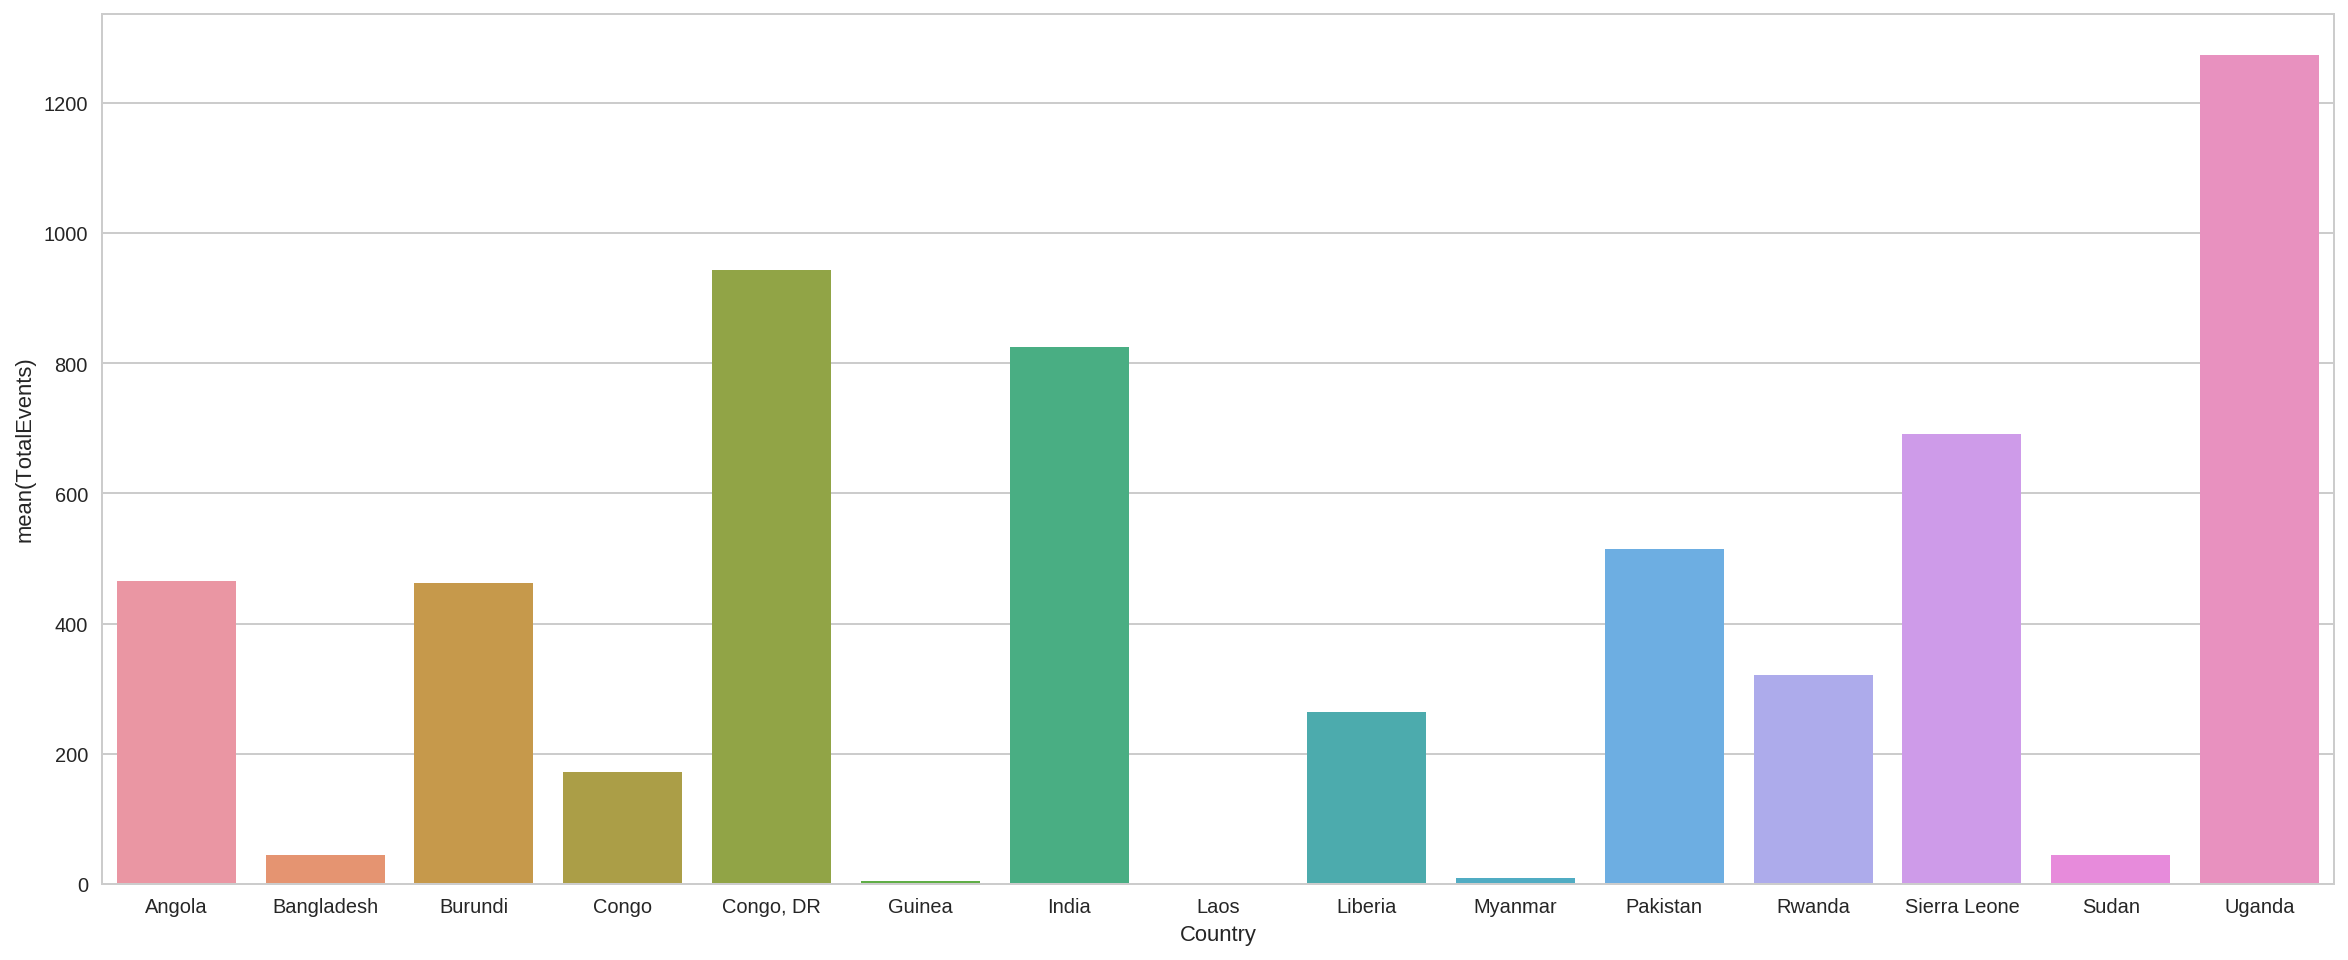

In [187]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x="Country", y="TotalEvents", data=acled_country)    

### The data shows that most armed conflict events have occurred in Uganda, Congo DR, India, and Sierra Leone. 

## Bar Graph for Armed Conflict Events per Year

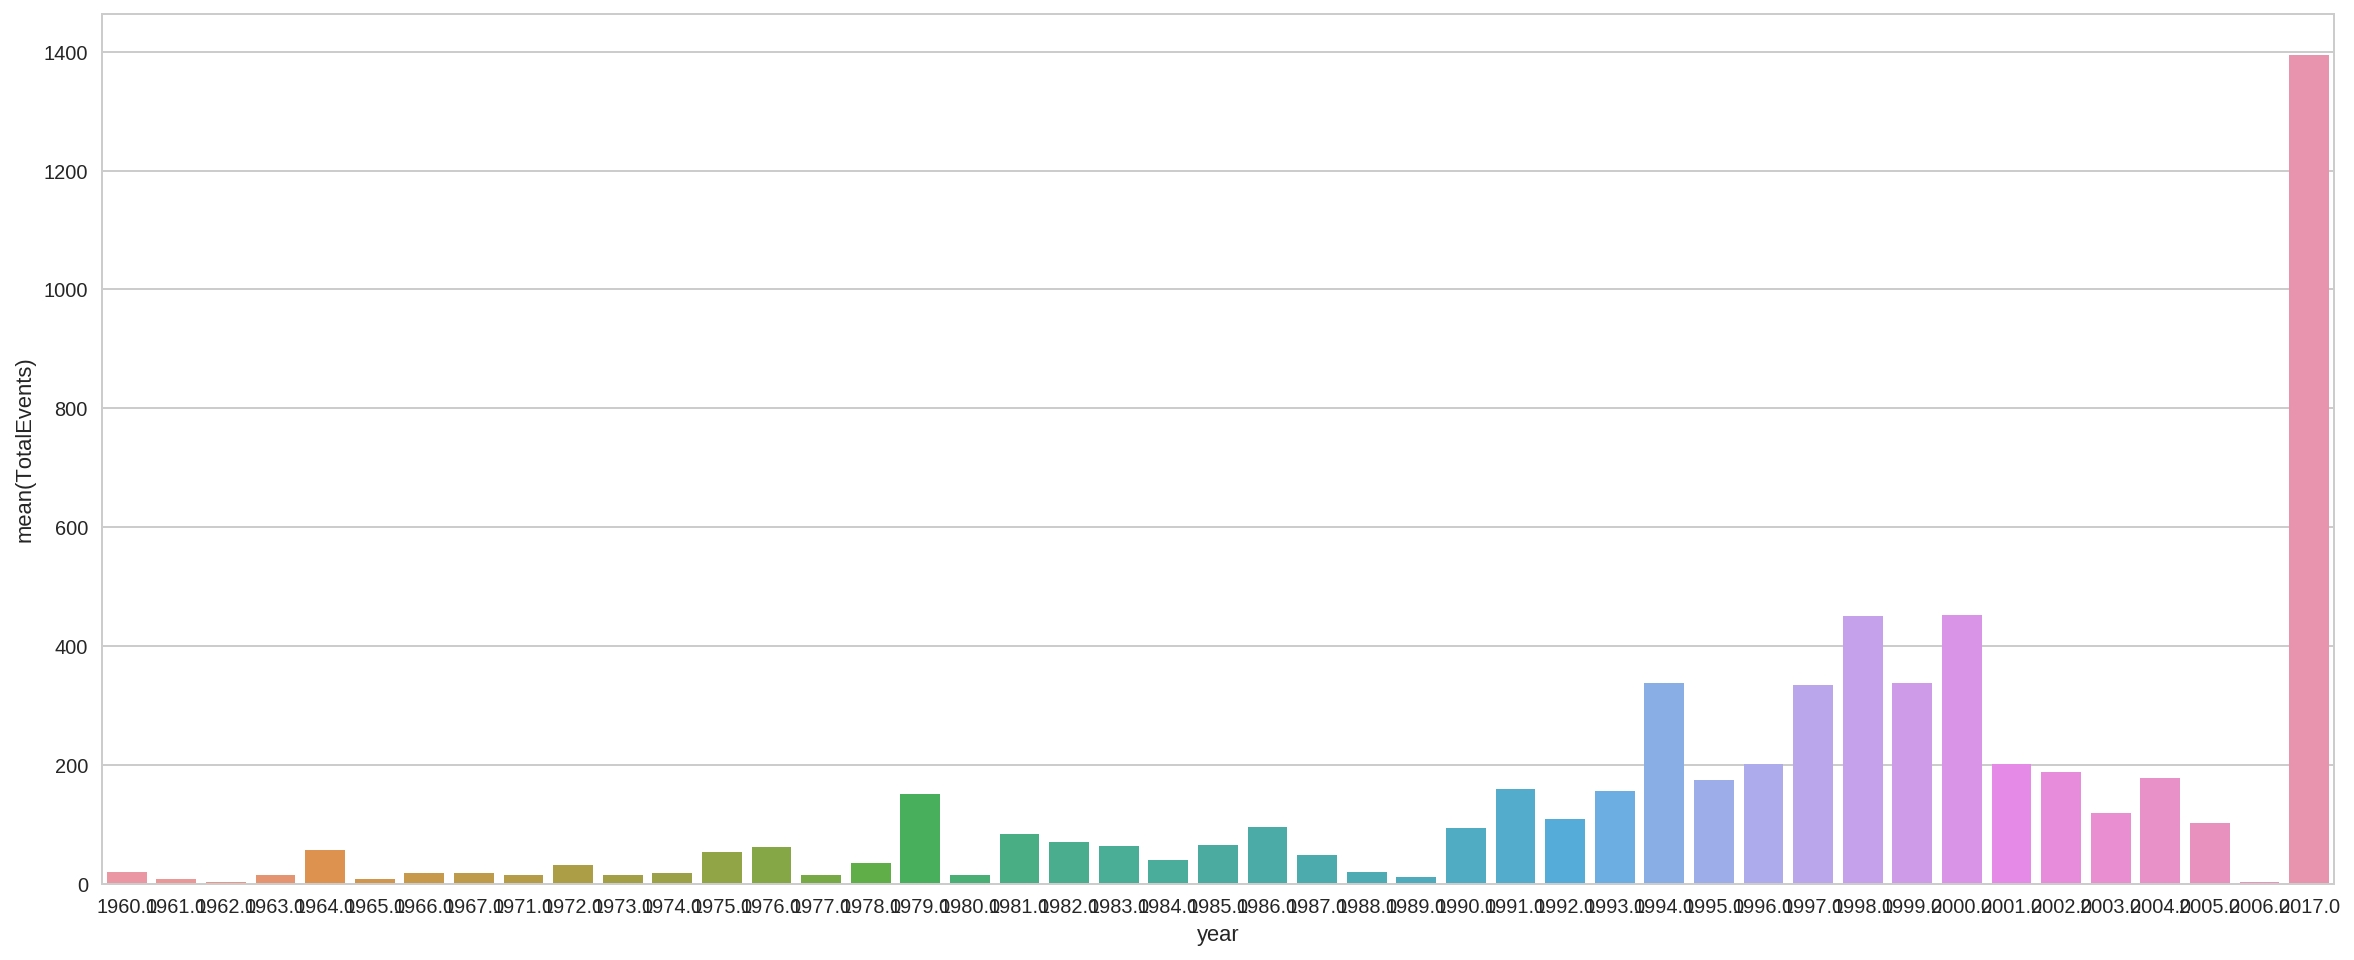

In [188]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x="year", y="TotalEvents", data=acled_year)    

### The data shows that most armed conflict events have occurred between the years of 1994 and 2004 peaking at 2000. There is a large increase for 2017 which I will explore later on.

## Table of Event Types by Country and Year

In [189]:
acled_eventtype_total.sort('TotalEvents', ascending=0).T

/home/dsi-student/Downloads/conda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,92,108,87,127,168,113,145,86,169,88,...,5,25,137,56,93,38,39,40,74,32
Country,India,Pakistan,"Congo, DR",Sierra Leone,Uganda,Rwanda,Uganda,"Congo, DR",Uganda,"Congo, DR",...,Angola,Angola,Uganda,Congo,Laos,Burundi,Burundi,Burundi,"Congo, DR",Burundi
year,2017,2017,2000,1998,2004,1994,1979,1999,2005,2001,...,1973,1996,1964,1981,2017,1975,1977,1987,1972,1963
EventType1,25,49,210,77,152,31,69,55,97,66,...,1,1,1,1,1,1,1,1,1,1
EventType2,8,27,10,43,0,34,64,37,0,6,...,0,0,0,0,0,0,0,0,0,0
EventType3,0,0,11,22,1,3,3,20,1,0,...,0,0,0,0,0,0,0,0,0,0
EventType4,5,14,2,0,1,2,0,2,0,3,...,0,0,0,0,0,0,0,0,0,0
EventType5,0,0,7,10,6,16,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0
EventType6,747,404,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EventType7,40,21,22,15,0,72,0,2,4,22,...,0,0,0,0,0,0,0,0,0,0
EventType8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### The most violent conflict events are occuring in India in 2017 in the form of rioting/protesting. Following that is Pakistan in 2017 and Congo DR in 1998. As mentioned before, there are numerous applications for this data set. In particular, I plan to utilize this data set to look at the features that predict different types of armed conflict events.

# Indicator Dataframe 1: Poverty and Equity

In [190]:
# Upload Poverty and Equity Data Set
df1 = pd.read_csv('Desktop/ECON628-01-RPanlilio/poverryandequity.csv')

### The Poverty and Equity Data Set contains information on national population at different income levels for different countries.

## Reshape Poverty and Equity Data Set

In [191]:
# Rename Column Names
df1.rename(columns={'country':'Country'}, inplace=True)
df1.rename(columns={'Date':'year'}, inplace=True)
df1.rename(columns={'Value':'value'}, inplace=True)

# Drop Columns
df1.drop('Unit', axis=1, inplace=True)

# Rename Country Names
df1.loc[df1.Country == 'Congo, Dem. Rep.', 'Country'] = 'Congo, DR'
df1.loc[df1.Country == 'Congo, Rep.', 'Country'] = 'Congo'
df1.loc[df1.Country == "Cote d'Ivoire", 'Country'] = 'Ivory Coast'
df1.loc[df1.Country == 'Lao PDR', 'Country'] = 'Laos'

# Create Base Dataframe to Merge onto
merge_base = pd.DataFrame(df1, columns = ['Country', 'year'])

# Create List of Unique Values for Countries, Years, and Indicators
indicators = df1.indicator.unique()
years = df1.year.unique()
countries = df1.Country.unique()

# Create Dataframes for each Indicator, Rename Columns, and Merge onto Base Dataframe
for i in indicators:
    df1_i = df1[df1.indicator == i]
    df1_i.rename(columns={'value':i}, inplace=True)
    merge_base = pd.merge(merge_base, df1_i, on=['Country', 'year'], how='left')

# Drop Duplicate Columns
merge_base.drop('indicator_x', axis=1, inplace=True)
merge_base.drop('indicator_y', axis=1, inplace=True)

# Rename Base Dataframe
df1_indicators = merge_base

In [192]:
# Check for Null/Missing Values in Indicator Data Set
df1_indicators.isnull().sum(axis=0)

Country                                                                                                               0
year                                                                                                                  0
Number of poor at $1.25 a day (PPP) (millions)                                                                     1414
Number of poor at $1.90 a day (2011 PPP) (millions)                                                                 983
Number of poor at $2 a day (PPP) (millions)                                                                        1414
Number of poor at $2.5 a day (PPP) (millions)                                                                      1414
Number of poor at $3.10 a day (2011 PPP) (millions)                                                                 983
Number of poor at $4 a day (PPP) (millions)                                                                        1414
Number of poor at $5 a day (PPP) (millio

In [193]:
# Description of Indicator Data Set
df1_indicators.describe()

,year,Number of poor at $1.25 a day (PPP) (millions),Number of poor at $1.90 a day (2011 PPP) (millions),Number of poor at $2 a day (PPP) (millions),Number of poor at $2.5 a day (PPP) (millions),Number of poor at $3.10 a day (2011 PPP) (millions),Number of poor at $4 a day (PPP) (millions),Number of poor at $5 a day (PPP) (millions),Poverty gap at $1.25 a day (PPP) (%),Poverty gap at $1.90 a day (2011 PPP) (%),...,Income share held by third 20%,"Population, Total","Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)","Annualized growth in per capita real survey mean consumption or income, total population (%)","Survey mean consumption or income per capita, bottom 40% (2011 PPP $ per day)","Survey mean consumption or income per capita, total population (2011 PPP $ per day)","Annualized growth in per capita real survey mean consumption or income, bottom 40% (%, based on 2005 PPP)","Annualized growth in per capita real survey mean consumption or income, total population (%, based on 2005 PPP)","Survey mean consumption or income per capita, bottom 40% (2005 PPP $ per day)","Survey mean consumption or income per capita, total population (2005 PPP $ per day)"
count,5492.000000,4078.000000,4509.000000,4078.000000,4078.000000,4509.000000,4078.000000,4078.000000,4078.000000,4509.000000,...,4605.000000,5.478000e+03,612.000000,612.000000,1070.000000,1070.000000,562.000000,562.000000,1109.000000,1109.000000
mean,2000.573379,35.778841,29.603975,67.003229,76.665893,61.781855,90.277155,93.531992,14.084803,11.409681,...,14.765385,9.047827e+07,4.005384,3.271394,2.096867,4.625266,4.371779,2.703594,1.208712,2.651445
std,9.338798,93.581207,85.371104,177.831888,200.952061,171.629785,233.983266,240.766139,13.412650,13.418575,...,1.343212,2.341066e+08,2.346531,2.066069,1.347644,3.063282,2.394257,1.422446,0.626257,1.465406
min,1974.000000,0.084009,0.026760,0.288032,0.427358,0.337134,0.781053,0.946727,0.040000,0.000000,...,9.550000,6.367020e+05,0.037100,-0.570600,0.290000,0.760000,1.400000,-0.390000,0.460000,1.470000
25%,1994.000000,2.390842,1.437700,5.013769,6.574045,3.667544,8.259569,8.436971,2.960000,1.600000,...,14.030000,9.008230e+06,2.214600,1.662900,1.214639,2.966043,2.990000,1.810000,0.880000,1.750000
50%,2003.000000,4.945801,4.029312,8.811137,11.240693,7.919625,15.915454,16.618040,11.170000,5.760000,...,14.880000,1.857153e+07,3.201500,3.472500,1.820000,3.840000,3.510000,3.040000,1.040000,2.260000
75%,2008.000000,13.993091,14.067027,21.756216,26.594266,21.402932,35.859912,42.243874,22.170000,19.010000,...,15.690000,6.413667e+07,5.036087,3.949492,2.390000,4.420000,7.290000,3.780000,1.380000,2.460000
max,2015.000000,468.643800,432.747660,851.223392,975.961328,835.320016,1129.376674,1160.368088,65.360000,63.590000,...,17.910000,1.311051e+09,9.575100,9.626500,6.540000,14.770000,9.210000,4.360000,3.240000,7.500000


In [194]:
# Data Types of Indicator Data Set
df1_indicators.dtypes

Country                                                                                                             object
year                                                                                                                 int64
Number of poor at $1.25 a day (PPP) (millions)                                                                     float64
Number of poor at $1.90 a day (2011 PPP) (millions)                                                                float64
Number of poor at $2 a day (PPP) (millions)                                                                        float64
Number of poor at $2.5 a day (PPP) (millions)                                                                      float64
Number of poor at $3.10 a day (2011 PPP) (millions)                                                                float64
Number of poor at $4 a day (PPP) (millions)                                                                        float64
Number of poor a

In [195]:
# Info of Indicator Data Set
df1_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5492 entries, 0 to 5491
Data columns (total 60 columns):
Country                                                                                                            5492 non-null object
year                                                                                                               5492 non-null int64
Number of poor at $1.25 a day (PPP) (millions)                                                                     4078 non-null float64
Number of poor at $1.90 a day (2011 PPP) (millions)                                                                4509 non-null float64
Number of poor at $2 a day (PPP) (millions)                                                                        4078 non-null float64
Number of poor at $2.5 a day (PPP) (millions)                                                                      4078 non-null float64
Number of poor at $3.10 a day (2011 PPP) (millions)                       

In [196]:
# Correlation of Indicator Data Set
df1_indicators.corr()

,year,Number of poor at $1.25 a day (PPP) (millions),Number of poor at $1.90 a day (2011 PPP) (millions),Number of poor at $2 a day (PPP) (millions),Number of poor at $2.5 a day (PPP) (millions),Number of poor at $3.10 a day (2011 PPP) (millions),Number of poor at $4 a day (PPP) (millions),Number of poor at $5 a day (PPP) (millions),Poverty gap at $1.25 a day (PPP) (%),Poverty gap at $1.90 a day (2011 PPP) (%),...,Income share held by third 20%,"Population, Total","Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)","Annualized growth in per capita real survey mean consumption or income, total population (%)","Survey mean consumption or income per capita, bottom 40% (2011 PPP $ per day)","Survey mean consumption or income per capita, total population (2011 PPP $ per day)","Annualized growth in per capita real survey mean consumption or income, bottom 40% (%, based on 2005 PPP)","Annualized growth in per capita real survey mean consumption or income, total population (%, based on 2005 PPP)","Survey mean consumption or income per capita, bottom 40% (2005 PPP $ per day)","Survey mean consumption or income per capita, total population (2005 PPP $ per day)"
year,1.000000,-0.020171,-0.052285,0.038090,0.053512,0.000085,0.070049,0.073144,-0.173842,-0.155153,...,-0.071781,0.060559,-0.119054,-0.038710,0.267913,0.253297,-0.033077,0.639989,0.165974,0.099508
Number of poor at $1.25 a day (PPP) (millions),-0.020171,1.000000,0.995043,0.984307,0.969865,0.980491,0.957333,0.954612,-0.037103,-0.050486,...,0.287163,0.947190,-0.133820,0.174145,-0.170407,-0.238816,-0.237427,0.205519,-0.141305,-0.212530
Number of poor at $1.90 a day (2011 PPP) (millions),-0.052285,0.995043,1.000000,0.985430,0.972659,0.982786,0.961706,0.959325,-0.036593,-0.007642,...,0.252227,0.946623,-0.044698,0.154270,-0.173477,-0.214219,-0.191070,0.262199,-0.166643,-0.213452
Number of poor at $2 a day (PPP) (millions),0.038090,0.984307,0.985430,1.000000,0.996825,0.999271,0.992938,0.991792,-0.081848,-0.079009,...,0.271820,0.987896,-0.106016,0.214815,-0.153925,-0.232812,-0.217457,0.209293,-0.117440,-0.195898
Number of poor at $2.5 a day (PPP) (millions),0.053512,0.969865,0.972659,0.996825,1.000000,0.997574,0.998310,0.997487,-0.095339,-0.089017,...,0.267267,0.994683,-0.099024,0.223528,-0.142508,-0.225040,-0.212755,0.210075,-0.106145,-0.187247
Number of poor at $3.10 a day (2011 PPP) (millions),0.000085,0.980491,0.982786,0.999271,0.997574,1.000000,0.994402,0.993385,-0.074988,-0.057657,...,0.258951,0.988260,-0.111542,0.071413,-0.145443,-0.196498,-0.199862,0.243243,-0.156607,-0.213058
Number of poor at $4 a day (PPP) (millions),0.070049,0.957333,0.961706,0.992938,0.998310,0.994402,1.000000,0.999909,-0.111606,-0.100462,...,0.256743,0.998770,-0.092050,0.231519,-0.131340,-0.214685,-0.208490,0.209408,-0.090061,-0.171193
Number of poor at $5 a day (PPP) (millions),0.073144,0.954612,0.959325,0.991792,0.997487,0.993385,0.999909,1.000000,-0.116276,-0.103966,...,0.253664,0.999317,-0.090845,0.232824,-0.127165,-0.210290,-0.207874,0.208708,-0.083569,-0.164385
Poverty gap at $1.25 a day (PPP) (%),-0.173842,-0.037103,-0.036593,-0.081848,-0.095339,-0.074988,-0.111606,-0.116276,1.000000,0.940475,...,-0.233588,-0.128215,-0.396756,-0.372498,-0.719793,-0.550454,-0.086051,0.403294,-0.726760,-0.584605
Poverty gap at $1.90 a day (2011 PPP) (%),-0.155153,-0.050486,-0.007642,-0.079009,-0.089017,-0.057657,-0.100462,-0.103966,0.940475,1.000000,...,-0.313328,-0.110033,0.387334,0.594230,-0.608777,-0.509629,0.178970,0.664164,-0.631559,-0.474872


In [197]:
# Shape of Indicator Data Set
df1_indicators.shape

(5492, 60)

# Indicator Dataframe 2: Index of Economic Freedom 

In [198]:
# Upload Index of Economic Freedom Data Set
df2 = pd.read_csv('Desktop/ECON628-01-RPanlilio/indexofeconomicfreedom.csv')

### The Index of Economic Freedom Data Set contains information on the assessment of institutional capabilities in providing and protecting economic freedom in different countries.

## Reshape Index of Economic Freedom Data Set

In [199]:
# Rename Column Names
df2.rename(columns={'country':'Country'}, inplace=True)
df2.rename(columns={'Date':'year'}, inplace=True)
df2.rename(columns={'Value':'value'}, inplace=True)

# Drop Columns
df2.drop('Unit', axis=1, inplace=True)

# Rename Country Names
df2.loc[df2.Country == 'Democratic Republic of Congo', 'Country'] = 'Congo, DR'
df2.loc[df2.Country == 'Republic of Congo', 'Country'] = 'Congo'
df2.loc[df2.Country == "CÃ´te d'Ivoire", 'Country'] = 'Ivory Coast'

# Create Base Dataframe to Merge onto
merge_base = pd.DataFrame(df2, columns = ['Country', 'year'])

# Create List of Unique Values for Countries, Years, and Indicators
indicators = df2.indicator.unique()
years = df2.year.unique()
countries = df2.Country.unique()

# Create Dataframes for each Indicator, Rename Columns, and Merge onto Base Dataframe
for i in indicators:
    df2_i = df2[df2.indicator == i]
    df2_i.rename(columns={'value':i}, inplace=True)
    merge_base = pd.merge(merge_base, df2_i, on=['Country', 'year'], how='left')

# Drop Duplicate Columns
merge_base.drop('indicator', axis=1, inplace=True)
merge_base.drop('indicator_x', axis=1, inplace=True)
merge_base.drop('indicator_y', axis=1, inplace=True)

# Rename Base Dataframe
df2_indicators = merge_base

In [200]:
# Check for Null/Missing Values in Indicator Data Set
df2_indicators.isnull().sum(axis=0)

Country                       0
year                          0
Overall Score               224
Property Rights              96
Government Integrity         17
Judicial Effectiveness    37674
Tax Burden                  108
Government Spending          78
Fiscal Health             37668
Business Freedom             19
Labor Freedom             14922
Monetary Freedom             62
Trade Freedom               134
Investment Freedom           71
Financial Freedom           157
dtype: int64

In [201]:
# Description of Indicator Data Set
df2_indicators.describe()

,year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
count,40047.000000,39823.000000,39951.000000,40030.000000,2373.000000,39939.000000,39969.000000,2379.000000,40028.000000,25125.00000,39985.000000,39913.000000,39976.000000,39890.000000
mean,2006.986641,59.349502,47.599972,40.687479,44.628108,72.765267,64.419418,66.963094,64.153295,60.85690,72.557669,68.903893,52.825195,49.903485
std,6.555336,11.760978,24.075348,22.580648,20.806492,15.533133,24.575692,30.440943,16.155202,16.71869,15.739702,16.129061,21.241853,19.982901
min,1995.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,52.700000,30.000000,25.000000,28.400000,64.800000,50.500000,46.900000,55.000000,49.50000,69.300000,61.000000,35.000000,30.000000
50%,2007.000000,59.400000,50.000000,33.500000,41.900000,75.000000,70.600000,77.200000,65.200000,61.00000,76.000000,72.000000,50.000000,50.000000
75%,2013.000000,67.200000,70.000000,52.000000,59.700000,82.900000,84.100000,92.500000,73.000000,72.90000,81.200000,80.400000,70.000000,70.000000
max,2017.000000,90.500000,97.100000,100.000000,93.000000,100.000000,99.300000,100.000000,100.000000,100.00000,95.400000,95.000000,95.000000,90.000000


In [202]:
# Data Types of Indicator Data Set
df2_indicators.dtypes

Country                    object
year                        int64
Overall Score             float64
Property Rights           float64
Government Integrity      float64
Judicial Effectiveness    float64
Tax Burden                float64
Government Spending       float64
Fiscal Health             float64
Business Freedom          float64
Labor Freedom             float64
Monetary Freedom          float64
Trade Freedom             float64
Investment Freedom        float64
Financial Freedom         float64
dtype: object

In [203]:
# Info of Indicator Data Set
df2_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40047 entries, 0 to 40046
Data columns (total 15 columns):
Country                   40047 non-null object
year                      40047 non-null int64
Overall Score             39823 non-null float64
Property Rights           39951 non-null float64
Government Integrity      40030 non-null float64
Judicial Effectiveness    2373 non-null float64
Tax Burden                39939 non-null float64
Government Spending       39969 non-null float64
Fiscal Health             2379 non-null float64
Business Freedom          40028 non-null float64
Labor Freedom             25125 non-null float64
Monetary Freedom          39985 non-null float64
Trade Freedom             39913 non-null float64
Investment Freedom        39976 non-null float64
Financial Freedom         39890 non-null float64
dtypes: float64(13), int64(1), object(1)
memory usage: 4.9+ MB


In [204]:
# Correlation of Indicator Data Set
df2_indicators.corr()

,year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
year,1.000000,0.082326,-0.144122,0.023038,NaN,0.287731,-0.036797,NaN,-0.011988,-0.014314,0.204967,0.386827,-0.008153,-0.039381
Overall Score,0.082326,1.000000,0.790609,0.758566,0.778937,0.276438,0.051728,0.462436,0.783218,0.561869,0.641291,0.610759,0.766535,0.805111
Property Rights,-0.144122,0.790609,1.000000,0.846498,0.822831,-0.142612,-0.285635,0.244764,0.728360,0.373270,0.390538,0.369874,0.669213,0.678458
Government Integrity,0.023038,0.758566,0.846498,1.000000,0.822111,-0.128448,-0.372786,0.241454,0.691190,0.353741,0.435662,0.453943,0.578186,0.615196
Judicial Effectiveness,NaN,0.778937,0.822831,0.822111,1.000000,-0.150278,-0.223828,0.206753,0.697043,0.399193,0.448305,0.543792,0.551742,0.623424
Tax Burden,0.287731,0.276438,-0.142612,-0.128448,-0.150278,1.000000,0.448046,0.110766,0.054693,0.217333,0.201228,0.225416,-0.028045,0.045654
Government Spending,-0.036797,0.051728,-0.285635,-0.372786,-0.223828,0.448046,1.000000,0.145991,-0.179853,-0.025639,0.036718,-0.150447,-0.130476,-0.121071
Fiscal Health,NaN,0.462436,0.244764,0.241454,0.206753,0.110766,0.145991,1.000000,0.138518,0.125672,0.229679,0.311539,0.087727,0.106408
Business Freedom,-0.011988,0.783218,0.728360,0.691190,0.697043,0.054693,-0.179853,0.138518,1.000000,0.488451,0.387907,0.420579,0.593930,0.610719
Labor Freedom,-0.014314,0.561869,0.373270,0.353741,0.399193,0.217333,-0.025639,0.125672,0.488451,1.000000,0.306013,0.288120,0.275256,0.321861


In [205]:
# Shape of Indicator Data Set
df2_indicators.shape

(40047, 15)

# Indicator Dataframe 3: Resource Statistics

In [206]:
# Upload Resource Statistics Data Set
df3 = pd.read_csv('Desktop/ECON628-01-RPanlilio/resourcestatistics.csv')

### The Resource Statistics Data Set contains information on the use of land, water, and agriculture in different countries.

## Reshape Resource Statistics Data Set

In [207]:
# Rename Column Names
df3.rename(columns={'country':'Country'}, inplace=True)
df3.rename(columns={'item':'indicator'}, inplace=True)
df3.rename(columns={'Date':'year'}, inplace=True)
df3.rename(columns={'Value':'value'}, inplace=True)

# Drop Columns
df3.drop('element', axis=1, inplace=True)
df3.drop('Unit', axis=1, inplace=True)

# Rename Country Names
df3.loc[df3.Country == 'Democratic Republic of Congo', 'Country'] = 'Congo, DR'
df3.loc[df3.Country == 'Republic of Congo', 'Country'] = 'Congo'
df3.loc[df3.Country == "CÃ´te d'Ivoire", 'Country'] = 'Ivory Coast'
df3.loc[df3.Country == "Lao People's Democratic Republic", 'Country'] = 'Laos'

# Create Base Dataframe to Merge onto
df3_indicators = pd.DataFrame(df3, columns = ['Country', 'year'])

# Create List of Unique Values for Countries, Years, and Indicators
indicators = df3.indicator.unique()
years = df3.year.unique()
countries = df3.Country.unique()

# Create Dataframes for each Indicator, Rename Columns, and Merge onto Base Dataframe
for i in indicators:
    df3_i = df3[df3.indicator == i]
    df3_i.rename(columns={'value':i}, inplace=True)
    df3_indicators = pd.merge(df3_indicators, df3_i, on=['Country', 'year'], how='left')

# Drop Duplicate Columns
df3_indicators.drop('indicator', axis=1, inplace=True)
df3_indicators.drop('indicator_x', axis=1, inplace=True)
df3_indicators.drop('indicator_y', axis=1, inplace=True)

In [208]:
# Check for Null/Missing Values in Indicator Data Set
df3_indicators.isnull().sum(axis=0)

Country                                                                0
year                                                                   0
Country area                                                         182
Land area                                                            182
Agricultural area                                                   1444
Agricultural area organic, total                                  204482
Agricultural area certified organic                               229188
Agricultural area in conversion to organic                        234896
Agricultural area actually irrigated                              232148
Arable land and Permanent crops                                     2888
Arable land                                                         5051
Temporary crops                                                   222902
Fallow land (temporary)                                           216150
Permanent crops                                    

In [209]:
# Description of Indicator Data Set
df3_indicators.describe()

,year,Country area,Land area,Agricultural area,"Agricultural area organic, total",Agricultural area certified organic,Agricultural area in conversion to organic,Agricultural area actually irrigated,Arable land and Permanent crops,Arable land,...,Area of arable land and permanent crops under protective cover,Temporary meadows and pastures,"Permanent crops organic, total",Permanent crops area certified organic,Permanent crops area in conversion to organic,Inland water,Perm. meadows & pastures - Cultivated,"Permanent meadows and pastures organic, total",Permanent meadows and pastures area certified organic,Permanent meadows and pastures area in conversion to organic
count,263146.000000,2.629640e+05,2.629640e+05,2.617020e+05,58664.000000,33958.000000,28250.000000,30998.000000,2.602580e+05,2.580950e+05,...,14686.000000,22726.000000,14224.000000,11630.000000,10064.000000,204595.000000,20336.000000,12258.000000,10780.000000,9970.000000
mean,1996.636981,2.780070e+05,2.693809e+05,1.028690e+05,274.742249,313.639023,44.730478,2430.791302,3.149465e+04,2.902116e+04,...,13.891934,812.573038,30.208907,21.591678,5.499781,11203.340076,3809.523384,119.681718,92.144104,21.501599
std,13.691438,1.025577e+06,9.923343e+05,3.723026e+05,1108.213148,1300.751173,91.005514,8906.174553,1.177707e+05,1.082474e+05,...,52.790386,2108.647324,80.419018,63.433657,16.466270,38901.342446,12785.116093,182.607619,149.699029,41.145852
min,1961.000000,1.000000e+00,1.000000e+00,3.000000e-01,0.000000,0.000000,0.000000,0.000000,3.000000e-01,8.000000e-02,...,0.000000,0.300000,0.050000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1991.000000,1.858000e+03,1.828000e+03,4.250000e+02,2.500000,3.550000,1.000000,25.000000,1.420000e+02,1.200000e+02,...,0.390000,61.000000,0.900000,0.560000,0.100000,100.000000,53.000000,10.500000,6.000000,2.400000
50%,2000.000000,1.638200e+04,1.560000e+04,4.720000e+03,21.960000,30.400000,8.400000,164.400000,2.024000e+03,1.707000e+03,...,1.930000,210.000000,1.850000,1.300000,0.500000,600.000000,724.200000,47.200000,26.600000,10.900000
75%,2007.000000,9.237700e+04,8.858000e+04,3.649000e+04,156.500000,149.000000,36.000000,1310.000000,9.786000e+03,8.479000e+03,...,7.000000,786.000000,6.200000,3.800000,2.350000,2522.000000,2881.000000,105.800000,74.800000,21.000000
max,2014.000000,1.346718e+07,1.305576e+07,4.954548e+06,17150.000000,17150.000000,626.600000,66103.000000,1.584563e+06,1.417153e+06,...,824.000000,25607.000000,490.300000,403.800000,110.500000,457620.200000,113005.200000,1307.400000,795.900000,385.600000


In [210]:
# Data Types of Indicator Data Set
df3_indicators.dtypes

Country                                                            object
year                                                                int64
Country area                                                      float64
Land area                                                         float64
Agricultural area                                                 float64
Agricultural area organic, total                                  float64
Agricultural area certified organic                               float64
Agricultural area in conversion to organic                        float64
Agricultural area actually irrigated                              float64
Arable land and Permanent crops                                   float64
Arable land                                                       float64
Temporary crops                                                   float64
Fallow land (temporary)                                           float64
Permanent crops                       

In [211]:
# Info of Indicator Data Set
df3_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263146 entries, 0 to 263145
Data columns (total 35 columns):
Country                                                           263146 non-null object
year                                                              263146 non-null int64
Country area                                                      262964 non-null float64
Land area                                                         262964 non-null float64
Agricultural area                                                 261702 non-null float64
Agricultural area organic, total                                  58664 non-null float64
Agricultural area certified organic                               33958 non-null float64
Agricultural area in conversion to organic                        28250 non-null float64
Agricultural area actually irrigated                              30998 non-null float64
Arable land and Permanent crops                                   260258 non-null floa

In [212]:
# Correlation of Indicator Data Set
df3_indicators.corr()

,year,Country area,Land area,Agricultural area,"Agricultural area organic, total",Agricultural area certified organic,Agricultural area in conversion to organic,Agricultural area actually irrigated,Arable land and Permanent crops,Arable land,...,Area of arable land and permanent crops under protective cover,Temporary meadows and pastures,"Permanent crops organic, total",Permanent crops area certified organic,Permanent crops area in conversion to organic,Inland water,Perm. meadows & pastures - Cultivated,"Permanent meadows and pastures organic, total",Permanent meadows and pastures area certified organic,Permanent meadows and pastures area in conversion to organic
year,1.000000,-0.039999,-0.040463,-0.031970,-0.015803,-0.048761,-0.101208,-0.041292,-0.028551,-0.032373,...,-0.035816,-0.092020,0.125482,0.091548,0.196521,-0.030492,0.083761,0.150825,0.151585,0.001511
Country area,-0.039999,1.000000,0.999952,0.981329,0.427515,0.464367,0.256579,0.377573,0.969402,0.969678,...,-0.017601,0.800682,0.326394,0.451546,0.306176,0.962343,0.364995,0.053798,0.053980,0.140037
Land area,-0.040463,0.999952,1.000000,0.982172,0.437592,0.478136,0.265663,0.370283,0.968863,0.969084,...,-0.016754,0.810123,0.326798,0.452746,0.308274,0.959667,0.366937,0.059660,0.060130,0.148343
Agricultural area,-0.031970,0.981329,0.982172,1.000000,0.590284,0.590397,0.448500,0.536546,0.968282,0.966317,...,-0.001665,0.904464,0.359099,0.460205,0.266940,0.919490,0.477359,0.202423,0.202011,0.285654
"Agricultural area organic, total",-0.015803,0.427515,0.437592,0.590284,1.000000,0.993313,0.676597,0.091754,0.332539,0.341091,...,0.120047,0.662863,0.734959,0.611644,0.780973,0.144708,0.148313,0.865427,0.871898,0.599365
Agricultural area certified organic,-0.048761,0.464367,0.478136,0.590397,0.993313,1.000000,0.562713,0.068301,0.322405,0.337458,...,0.257819,0.665847,0.728016,0.617918,0.736730,0.122712,0.194650,0.888504,0.903187,0.489140
Agricultural area in conversion to organic,-0.101208,0.256579,0.265663,0.448500,0.676597,0.562713,1.000000,0.300030,0.439175,0.425784,...,0.582916,0.503534,0.712343,0.529960,0.776113,0.086476,0.239122,0.615549,0.483542,0.822975
Agricultural area actually irrigated,-0.041292,0.377573,0.370283,0.536546,0.091754,0.068301,0.300030,1.000000,0.847043,0.831880,...,0.282086,0.684812,0.667607,0.704162,0.624652,0.463515,0.198295,0.181835,0.157463,0.261531
Arable land and Permanent crops,-0.028551,0.969402,0.968863,0.968282,0.332539,0.322405,0.439175,0.847043,1.000000,0.999475,...,0.015460,0.795226,0.547629,0.576519,0.531107,0.945479,0.311616,0.324231,0.332105,0.413283
Arable land,-0.032373,0.969678,0.969084,0.966317,0.341091,0.337458,0.425784,0.831880,0.999475,1.000000,...,0.008073,0.801054,0.474889,0.517608,0.449085,0.947421,0.323959,0.298396,0.309338,0.375804


# Total Data Set

In [363]:
# Merge Indicator Data Sets with ACLED Event Type Data Set
data = pd.merge(acled_eventtype_total, df2_indicators, on=['Country', 'year'])

In [364]:
# Check for Null/Missing Values in Total Data Set
data.isnull().sum(axis=0)

Country                     0
year                        0
EventType1                  0
EventType2                  0
EventType3                  0
EventType4                  0
EventType5                  0
EventType6                  0
EventType7                  0
EventType8                  0
TotalEvents                 0
Overall Score               0
Property Rights             0
Government Integrity        0
Judicial Effectiveness    452
Tax Burden                  0
Government Spending         0
Fiscal Health             452
Business Freedom            0
Labor Freedom             430
Monetary Freedom            0
Trade Freedom               0
Investment Freedom          0
Financial Freedom           0
dtype: int64

In [365]:
# Description of Total Data Set
data.describe()

,year,EventType1,EventType2,EventType3,EventType4,EventType5,EventType6,EventType7,EventType8,TotalEvents,...,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.0,504.000000,...,52.00000,504.000000,504.000000,52.000000,504.000000,74.000000,504.000000,504.000000,504.000000,504.000000
mean,2000.545635,28.329365,7.172619,3.771825,1.621032,4.384921,30.603175,3.482143,0.0,79.365079,...,35.10000,62.111706,78.779167,45.425000,57.456349,61.706757,53.207937,49.312302,39.563492,33.194444
std,6.100378,37.915238,11.776580,5.732742,2.819492,5.188174,133.119542,8.797008,0.0,150.619073,...,6.60098,15.247179,25.057911,26.500321,10.919354,19.968916,29.149994,17.356636,15.031707,14.785205
min,1995.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,...,26.00000,32.800000,0.000000,11.000000,40.000000,37.800000,0.000000,16.200000,10.000000,10.000000
25%,1997.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.000000,...,32.07500,51.700000,77.400000,25.850000,55.000000,41.600000,27.400000,35.000000,30.000000,30.000000
50%,1999.000000,18.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.0,40.000000,...,35.00000,54.700000,88.200000,46.000000,55.000000,54.400000,59.000000,49.000000,30.000000,30.000000
75%,2001.000000,33.000000,9.000000,5.000000,2.000000,7.000000,0.000000,0.000000,0.0,76.000000,...,38.02500,80.600000,91.600000,65.575000,70.000000,87.900000,77.100000,67.200000,50.000000,40.000000
max,2017.000000,210.000000,46.000000,22.000000,14.000000,20.000000,747.000000,40.000000,0.0,825.000000,...,44.40000,86.100000,97.200000,78.700000,85.000000,87.900000,90.300000,74.600000,70.000000,70.000000


In [366]:
# Data Types of Total Data Set
data.dtypes

Country                    object
year                      float64
EventType1                  int64
EventType2                float64
EventType3                float64
EventType4                float64
EventType5                float64
EventType6                float64
EventType7                float64
EventType8                float64
TotalEvents               float64
Overall Score             float64
Property Rights           float64
Government Integrity      float64
Judicial Effectiveness    float64
Tax Burden                float64
Government Spending       float64
Fiscal Health             float64
Business Freedom          float64
Labor Freedom             float64
Monetary Freedom          float64
Trade Freedom             float64
Investment Freedom        float64
Financial Freedom         float64
dtype: object

In [367]:
# Info of Total Data Set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 24 columns):
Country                   504 non-null object
year                      504 non-null float64
EventType1                504 non-null int64
EventType2                504 non-null float64
EventType3                504 non-null float64
EventType4                504 non-null float64
EventType5                504 non-null float64
EventType6                504 non-null float64
EventType7                504 non-null float64
EventType8                504 non-null float64
TotalEvents               504 non-null float64
Overall Score             504 non-null float64
Property Rights           504 non-null float64
Government Integrity      504 non-null float64
Judicial Effectiveness    52 non-null float64
Tax Burden                504 non-null float64
Government Spending       504 non-null float64
Fiscal Health             52 non-null float64
Business Freedom          504 non-null float64
Labor F

In [368]:
# Correlation of Total Data Set
data.corr()

,year,EventType1,EventType2,EventType3,EventType4,EventType5,EventType6,EventType7,EventType8,TotalEvents,...,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
year,1.000000,0.096340,-0.043653,-0.271292,0.275466,-0.249742,0.616492,0.498987,NaN,0.581076,...,NaN,0.510633,0.106083,NaN,-0.008607,-0.857858,0.397534,0.522358,0.144175,0.153665
EventType1,0.096340,1.000000,0.229516,0.290977,0.036040,0.202860,0.027746,0.351640,NaN,0.333472,...,0.178684,0.142555,0.223928,-0.631920,0.100412,0.166887,0.079786,0.132317,-0.023886,0.166255
EventType2,-0.043653,0.229516,1.000000,0.743107,0.253507,0.125225,0.139486,0.205393,NaN,0.308582,...,0.164325,-0.083639,0.280935,-0.578809,0.217490,-0.708899,-0.252447,-0.039823,-0.012994,-0.095886
EventType3,-0.271292,0.290977,0.743107,1.000000,-0.082603,0.135976,-0.150072,0.075076,NaN,0.044297,...,NaN,-0.131638,0.228436,NaN,0.309034,0.551843,-0.127842,-0.127980,0.019375,-0.122733
EventType4,0.275466,0.036040,0.253507,-0.082603,1.000000,-0.144400,0.514433,0.347636,NaN,0.514463,...,0.217391,-0.021664,0.134732,-0.627931,0.011531,-0.732691,-0.117155,0.116889,-0.010009,-0.006670
EventType5,-0.249742,0.202860,0.125225,0.135976,-0.144400,1.000000,-0.191692,0.012391,NaN,-0.070922,...,NaN,-0.185094,0.278167,NaN,0.188501,NaN,0.075711,-0.049767,-0.069730,-0.079300
EventType6,0.616492,0.027746,0.139486,-0.150072,0.514433,-0.191692,1.000000,0.759336,NaN,0.943371,...,0.786511,0.233673,0.022485,-0.955873,-0.036860,-0.748410,0.169909,0.280156,0.088348,0.101574
EventType7,0.498987,0.351640,0.205393,0.075076,0.347636,0.012391,0.759336,1.000000,NaN,0.843888,...,0.733688,0.096756,0.131701,-0.915300,-0.033882,-0.711261,0.099483,0.216336,0.022267,-0.010948
EventType8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalEvents,0.581076,0.333472,0.308582,0.044297,0.514463,-0.070922,0.943371,0.843888,NaN,1.000000,...,0.755370,0.229729,0.126698,-0.959241,0.026196,-0.732194,0.151874,0.286039,0.070503,0.115960


In [369]:
# Shape of Total Data Set
data.shape

(504, 24)

In [370]:
# Replace NaN values with Mean
data = data.fillna(data.mean())

In [371]:
# Check for Missing Values
data.isnull().sum(axis=0)

Country                   0
year                      0
EventType1                0
EventType2                0
EventType3                0
EventType4                0
EventType5                0
EventType6                0
EventType7                0
EventType8                0
TotalEvents               0
Overall Score             0
Property Rights           0
Government Integrity      0
Judicial Effectiveness    0
Tax Burden                0
Government Spending       0
Fiscal Health             0
Business Freedom          0
Labor Freedom             0
Monetary Freedom          0
Trade Freedom             0
Investment Freedom        0
Financial Freedom         0
dtype: int64

In [372]:
# Check Shape of Data Set
data.shape

(504, 24)

# Predictions

In [373]:
# Set y and X Variables
y = data.TotalEvents.values
col = data.columns.tolist()
exclude_cols  =  ['Country', 'year', 'EventType1', 'EventType2', 'EventType3', 'EventType4', 'EventType5', 'EventType6', 'EventType7', 'EventType8', 'TotalEvents']
X = data[[i for i in col if i not in exclude_cols ]]
print y.shape, X.shape

(504,) (504, 13)


In [374]:
# Standardize the Data
ss = StandardScaler() 
Xn = ss.fit_transform(X)
Xn.shape

# Create Train and Test DataSets
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print 'Shape of X_train: ', X_train.shape
print 'Shape of y_train: ', y_train.shape 
print 'Shape of X_test: ', X_test.shape
print 'Shape of y_test: ', y_test.shape

Shape of X_train:  (352, 13)
Shape of y_train:  (352,)
Shape of X_test:  (152, 13)
Shape of y_test:  (152,)


# Machine Learning Methods

## OLS

In [375]:
# Linear Regression
lm = LinearRegression()

# Fit the Model
model = lm.fit(X_train, y_train)

# Cross Validate the Model
lm_scores = cross_val_score(lm, X_train, y_train, cv=10)

# Print the R^2
print 'Cross validated R^2 OLS Scores:'
print lm_scores
print "Average Cross Validated R^2 OLS Score: %.3f" % (np.mean(lm_scores))

Cross validated R^2 OLS Scores:
[ 0.88669032  0.91095991  0.36126744  0.77678216  0.88219909  0.93097954
 -0.78296473  0.93531475  0.94102714  0.88959638]
Average Cross Validated R^2 OLS Score: 0.673


In [376]:
# Define a function that calls the MSE and R^2
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    print ('Performance of ' + test + ' Regression:\n')

    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    print ('MSE ' + test + ' Train Data: %.2f, Test Data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    print('R^2 ' + test + ' Train Data: %.2f, Test Data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [377]:
# Performance of OLS Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lm)

Performance of OLS Regression:

MSE OLS Train Data: 2176.73, Test Data: 2490.97
R^2 OLS Train Data: 0.90, Test Data: 0.90


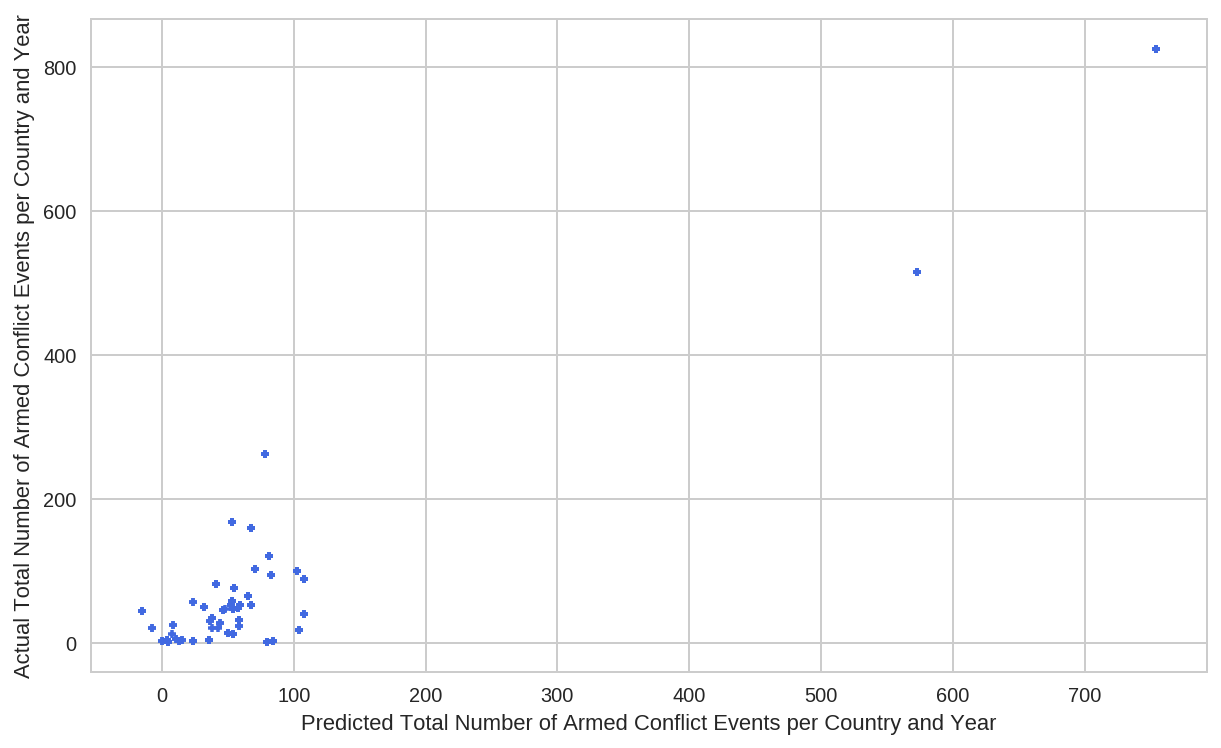

In [331]:
# Predictions
predictions = lm.predict(X_test)
predictions.shape

fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y_test, s=18, c='royalblue', marker='+')
plt.xlabel("Predicted Total Number of Armed Conflict Events per Country and Year")
plt.ylabel("Actual Total Number of Armed Conflict Events per Country and Year")
plt.show()

## Regularization

### Ridge Regression

In [332]:
# Find the Optimal Alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print 'Optimal Ridge alpha:' ,optimal_ridge.alpha_

# Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

# Fit the Ridge regression
ridge.fit(X_train, y_train)

# Cross Validate the Model
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)

# Print the R^2
print 'Cross Validated R^2 Ridge Scores:'
print ridge_scores
print "Average Cross Validated R^2 Ridge Score: %.3f" % (np.mean(ridge_scores))

Optimal Ridge alpha: 1.0
Cross Validated R^2 Ridge Scores:
[ 0.72451214  0.82148632 -0.62128606  0.68517775  0.72425584  0.81434629
 -3.02932117  0.85766239  0.88052557  0.82938235]
Average Cross Validated R^2 Ridge Score: 0.269


In [333]:
# Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

Performance of Ridge Regression:

MSE Ridge Train Data: 4614.80, Test Data: 4844.35
R^2 Ridge Train Data: 0.79, Test Data: 0.81


### Lasso Regression

In [334]:
# Find the Optimal Alpha
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print 'Optimal Lasso Alpha:', optimal_lasso.alpha_

# Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

# Fit the Lasso Regression
lasso.fit(X_train, y_train)

# Cross Validate the Model
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

# Print the R^2
print 'Cross Validated R^2 Lasso Scores:'
print lasso_scores
print "Average Cross Validated R^2 Lasso Score: %.3f" % (np.mean(lasso_scores))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal Lasso Alpha: 0.0975296370347
Cross Validated R^2 Lasso Scores:
[ 0.85907343  0.89287477  0.19714617  0.78501124  0.86460304  0.90608094
 -1.01165168  0.92743601  0.94361731  0.89446301]
Average Cross Validated R^2 Lasso Score: 0.626


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.5s finished


In [335]:
# Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

Performance of Lasso Regression:

MSE Lasso Train Data: 2506.75, Test Data: 2790.74
R^2 Lasso Train Data: 0.88, Test Data: 0.89


### Elastic Net Regression

In [336]:
# Find the Optimal Alpha
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

# Implement the Elastic Net Regression
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

# Fit the Model
enet.fit(X_train, y_train)

# Cross Validate the Model
enet_scores = cross_val_score(enet, X_train, y_train, cv=10)

# Print the R^2
print 'Cross Validated R^2 Elastic Net Scores:'
print enet_scores
print "Average Cross Validated R^2 ElasticNet Score: %.3f" % (np.mean(enet_scores))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0975296370347
1.0
Cross Validated R^2 Elastic Net Scores:
[ 0.85907343  0.89287477  0.19714617  0.78501124  0.86460304  0.90608094
 -1.01165168  0.92743601  0.94361731  0.89446301]
Average Cross Validated R^2 ElasticNet Score: 0.626


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   27.2s finished


In [337]:
# Evaluate the Elastic Net Regression 
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Enet", enet)

Performance of Enet Regression:

MSE Enet Train Data: 2506.75, Test Data: 2790.74
R^2 Enet Train Data: 0.88, Test Data: 0.89


## Best Predictors

In [338]:
# Define a function to print Coefficients, Absolute Values, and Non-Absolute Values
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'Variable':X.columns, 
                                 'Coefficient':best_regulari.coef_, 
                                 'Absolute Coefficient':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('Absolute Coefficient', inplace=True, ascending=False)
    return method_coefs.head(8)

# For my analysis, I choose to use Lasso Regression as it has the lowest MSE for the test and train data. I could also use eNet.  

In [339]:
best_reg_method(X, lasso)

,Absolute Coefficient,Coefficient,Variable
0,1401.134218,-1401.134218,Overall Score
9,378.128120,378.128120,Monetary Freedom
5,355.513408,355.513408,Government Spending
10,230.607601,230.607601,Trade Freedom
4,221.809636,221.809636,Tax Burden
12,219.452227,219.452227,Financial Freedom
1,217.486418,217.486418,Property Rights
11,168.387962,168.387962,Investment Freedom


In [341]:
best_reg_method(X, enet)

,Absolute Coefficient,Coefficient,Variable
0,1401.134218,-1401.134218,Overall Score
9,378.128120,378.128120,Monetary Freedom
5,355.513408,355.513408,Government Spending
10,230.607601,230.607601,Trade Freedom
4,221.809636,221.809636,Tax Burden
12,219.452227,219.452227,Financial Freedom
1,217.486418,217.486418,Property Rights
11,168.387962,168.387962,Investment Freedom


## Regression Tree

In [342]:
# Implement the Regression Tree
dtr = DecisionTreeRegressor()

# Gridsearch the Regression Tree
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# Cross Validate the Model
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [343]:
# Fit the Regression Tree
dtr_gs.fit(X_train, y_train)

# Print Best Estimator, Parameters and Score
dtr_best = dtr_gs.best_estimator_ 

print "Best Estimator:"
print dtr_best
print "Best Parameters:"
print dtr_gs.best_params_
print "Best Score: ", dtr_gs.best_score_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Estimator:
DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Parameters:
{'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 20, 'min_samples_leaf': 1}
Best Score:  0.998898365486


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    2.4s finished


In [344]:
# Evaluate the Regression Tree Performance on the Train and Test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

Performance of Regression tree Regression:

MSE Regression tree Train Data: 22.04, Test Data: 28.41
R^2 Regression tree Train Data: 1.00, Test Data: 1.00


In [345]:
# Print the Features that Best explain y
# Define a function to print Feature Importance using Best Models
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'Feature':X.columns, 'Importance':best_model.feature_importances_})
    feature_importance.sort_values('Importance', ascending=False, inplace=True)
    return feature_importance

In [346]:
feature_importance(X, dtr_best)

,Feature,Importance
6,Fiscal Health,0.836743
5,Government Spending,0.065116
0,Overall Score,0.032137
11,Investment Freedom,0.022834
9,Monetary Freedom,0.021821
4,Tax Burden,0.008371
2,Government Integrity,0.007229
10,Trade Freedom,0.005719
7,Business Freedom,0.000022
3,Judicial Effectiveness,0.000005


# Looking at these features, Government Spending is high on the list for both the Lasso and Regression Tree.

### Random Forest Regression Tree

In [348]:
# Define the Random Forest Function
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [349]:
# Fit the Random Forest Tree
estimator_rfr.fit(X_train, y_train)

# Print the Best Estimator, Parameters, and Score
rfr_best = estimator_rfr.best_estimator_
print "Best Estimator:"
print rfr_best
print "Best Parameters:"
print estimator_rfr.best_params_
print "Best Score:"
print estimator_rfr.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   33.1s finished


Best Estimator:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Best Parameters:
{'min_samples_split': 4, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 5}
Best Score:
0.958824115233


In [378]:
# Print the Feauture Importance
feature_importance(X, rfr_best)

,Feature,Importance
6,Fiscal Health,0.502461
8,Labor Freedom,0.365917
5,Government Spending,0.026820
11,Investment Freedom,0.025952
9,Monetary Freedom,0.022361
0,Overall Score,0.017424
4,Tax Burden,0.014172
1,Property Rights,0.006077
7,Business Freedom,0.005340
2,Government Integrity,0.004929


In [379]:
# Evaluate the model
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

Performance of Random Forest Regression tree Regression:

MSE Random Forest Regression tree Train Data: 655.64, Test Data: 779.97
R^2 Random Forest Regression tree Train Data: 0.97, Test Data: 0.97


In [380]:
# Summary of the Performance of Models
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lm)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

Performance of OLS Regression:

MSE OLS Train Data: 2176.73, Test Data: 2490.97
R^2 OLS Train Data: 0.90, Test Data: 0.90
Performance of Lasso Regression:

MSE Lasso Train Data: 2506.75, Test Data: 2790.74
R^2 Lasso Train Data: 0.88, Test Data: 0.89
Performance of Ridge Regression:

MSE Ridge Train Data: 4614.80, Test Data: 4844.35
R^2 Ridge Train Data: 0.79, Test Data: 0.81
Performance of Elastic Net Regression:

MSE Elastic Net Train Data: 2506.75, Test Data: 2790.74
R^2 Elastic Net Train Data: 0.88, Test Data: 0.89
Performance of Regression tree Regression:

MSE Regression tree Train Data: 22.04, Test Data: 28.41
R^2 Regression tree Train Data: 1.00, Test Data: 1.00
Performance of Random Forest Regression tree Regression:

MSE Random Forest Regression tree Train Data: 655.64, Test Data: 779.97
R^2 Random Forest Regression tree Train Data: 0.97, Test Data: 0.97


# The output shows that Regression Tree has the lowest MSE but the R^2 is at 1. Random Forest also has a low MSE but the R^2 is still a bit high. In this case, I would select OLS as it has the best balance between MSE and R^2.

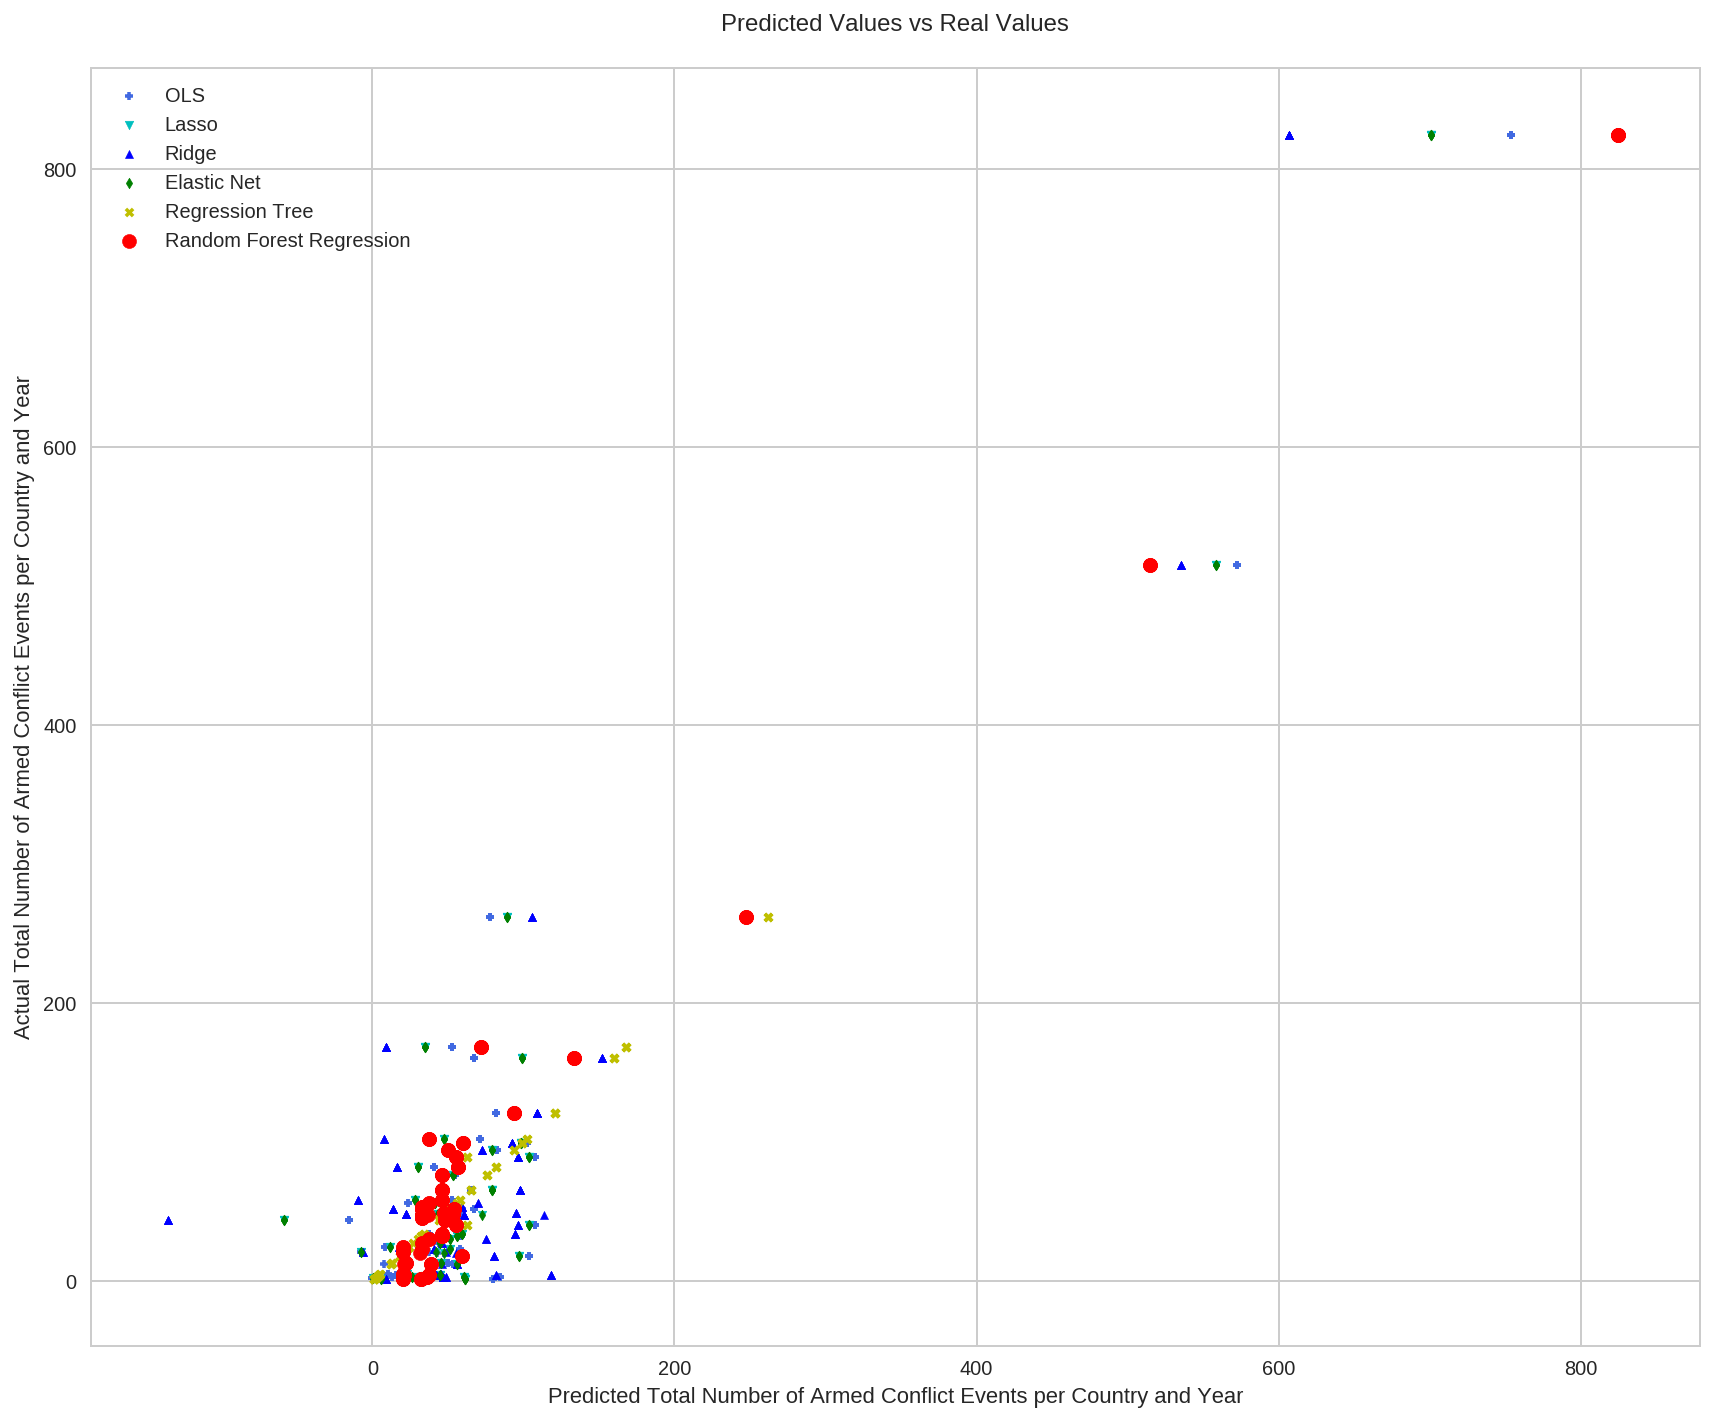

In [381]:
with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(12,10))
    plt.scatter(lm.predict(X_test), y_test, s=20, c='royalblue', marker='+', label="OLS")
    plt.scatter(lasso.predict(X_test), y_test, color='c', s=18, marker='v', label='Lasso')
    plt.scatter(ridge.predict(X_test), y_test, color='b', s=16, marker="^", label='Ridge')
    plt.scatter(enet.predict(X_test), y_test, color='g', s=14, marker="d", label='Elastic Net')
    plt.scatter(dtr_gs.predict(X_test), y_test, color='y', s=13, marker="x", label='Regression Tree' )
    plt.scatter(estimator_rfr.predict(X_test), y_test, color='r', marker='o', label='Random Forest Regression')
    
    plt.title('Predicted Values vs Real Values\n')
    plt.xlabel("Predicted Total Number of Armed Conflict Events per Country and Year")
    plt.ylabel("Actual Total Number of Armed Conflict Events per Country and Year")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Summary

# With the data I have, there is still definitely a lot more that I could do. I plan to work more with this data when I have more time. I ended up not using as many data sets as I have had previously due to time constraints. Also, considering that there is data on latitude and longitude, it would be interesting to merge this with other GIS data. But generally, the findings show that government spending is a strong predictor of armed conflict events. I do plan to look at problems that could be affecting my findings after submission. 